In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv("C:/Users/crist/Downloads/projects.csv")
df.head(4)

,name,type,region,owner,typology,typology_des,investment,entry_date,state,qualification_date,id_project,latitude,longitude,n_docs,n_addendum,n_participatory,description,main_url
0,Instalación Fibra Optica (desde Cerro Chapiqui...,DIA,Decimoquinta,Entel Chile S.A.,p,"Ejecución de obras, programas o actividades en...",3.00,1997-07-31,Aprobado,1997-10-14,10,-18.343267,-69.537667,2,0,0,NaN,https://seia.sea.gob.cl/expediente/expediente....
1,Planta Minera Doña Leonor,EIA,Cuarta,NaN,i4,Proyecto de desarrollo minero sobre 5000 tons/...,0.15,1995-12-11,Aprobado,1996-06-04,13,-31.723339,-70.935702,6,0,0,NaN,https://seia.sea.gob.cl/expediente/expediente....
2,Planta de Tratamiento de Aguas Servidas Median...,DIA,Quinta,Ilustre municipalidad de nogales,o4,Plantas de tratamiento de aguas de origen domi...,0.44,1997-09-01,Aprobado,1997-12-22,14,-32.697018,-71.210925,3,0,0,NaN,https://seia.sea.gob.cl/expediente/expediente....
3,Relleno Sanitario Sector Colihues - La Yesca,EIA,Sexta,Ilustre Municipalidad de Rancagua,o5,Plantas de tratamiento y/o disposición de resi...,0.17,1996-05-07,Aprobado,1996-11-15,15,-34.231782,-70.704146,7,0,0,NaN,https://seia.sea.gob.cl/expediente/expediente....


**COLUMNAS**
* **Type**=Estudio de impacto ambiental (EIA) y (Declaracion de impacto ambiental (DIA)  
     EIA= SE presenta si genera alguno de los efectos mencionados
     DIA= Si el proyecto no genera ninguno de los efectos mencionados


# Parte 1
## 1.1 Informacion

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26953 entries, 0 to 26952
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                26953 non-null  object 
 1   type                26953 non-null  object 
 2   region              26953 non-null  object 
 3   owner               26928 non-null  object 
 4   typology            26953 non-null  object 
 5   typology_des        26950 non-null  object 
 6   investment          26953 non-null  float64
 7   entry_date          26953 non-null  object 
 8   state               26953 non-null  object 
 9   qualification_date  25704 non-null  object 
 10  id_project          26953 non-null  int64  
 11  latitude            26769 non-null  float64
 12  longitude           26769 non-null  float64
 13  n_docs              26953 non-null  int64  
 14  n_addendum          26953 non-null  int64  
 15  n_participatory     26953 non-null  int64  
 16  desc

## 1.2 Descripcion

In [4]:
df.describe()

,investment,id_project,latitude,longitude,n_docs,n_addendum,n_participatory
count,26953.000000,2.695300e+04,26769.000000,26769.000000,26953.000000,26953.000000,26953.000000
mean,27.985738,5.453025e+08,-36.007376,-71.655681,35.762438,0.936371,0.064483
std,205.103695,9.291975e+08,7.723686,1.570468,83.774017,1.062214,0.958007
min,0.000000,1.000000e+01,-55.966667,-109.439249,1.000000,0.000000,0.000000
25%,0.126200,2.833640e+05,-41.671245,-72.906655,5.000000,0.000000,0.000000
50%,1.200000,3.334577e+06,-35.017515,-71.395770,32.000000,1.000000,0.000000
75%,7.000000,2.128520e+09,-33.043875,-70.670081,53.000000,2.000000,0.000000
max,6800.000000,2.151059e+09,-17.596368,-67.058810,10400.000000,8.000000,57.000000


In [5]:
df.describe(include=object)

,name,type,region,owner,typology,typology_des,entry_date,state,qualification_date,description,main_url
count,26953,26953,26953,26928,26953,26950,26953,26953,25704,11678,26953
unique,24787,2,17,9662,86,114,5756,11,5563,11410,26953
top,Transporte de Residuos Peligrosos (e-seia),DIA,RM,MINISTERIO DE OBRAS PÚBLICAS,n3,Producción anual igual o mayor a (35ton) tratá...,2013-12-23,Aprobado,2006-02-22,El proceso de manejo de Residuos de Mortalidad...,https://seia.sea.gob.cl/expediente/expediente....
freq,12,25585,4658,380,2910,2910,123,16963,60,20,1


## 1.3 Valores nulos

In [6]:
df.isnull().sum()

name                      0
type                      0
region                    0
owner                    25
typology                  0
typology_des              3
investment                0
entry_date                0
state                     0
qualification_date     1249
id_project                0
latitude                184
longitude               184
n_docs                    0
n_addendum                0
n_participatory           0
description           15275
main_url                  0
dtype: int64

## 1.4 Verificacion de duplicados

In [7]:
df.drop_duplicates()

,name,type,region,owner,typology,typology_des,investment,entry_date,state,qualification_date,id_project,latitude,longitude,n_docs,n_addendum,n_participatory,description,main_url
0,Instalación Fibra Optica (desde Cerro Chapiqui...,DIA,Decimoquinta,Entel Chile S.A.,p,"Ejecución de obras, programas o actividades en...",3.000,1997-07-31,Aprobado,1997-10-14,10,-18.343267,-69.537667,2,0,0,NaN,https://seia.sea.gob.cl/expediente/expediente....
1,Planta Minera Doña Leonor,EIA,Cuarta,NaN,i4,Proyecto de desarrollo minero sobre 5000 tons/...,0.150,1995-12-11,Aprobado,1996-06-04,13,-31.723339,-70.935702,6,0,0,NaN,https://seia.sea.gob.cl/expediente/expediente....
2,Planta de Tratamiento de Aguas Servidas Median...,DIA,Quinta,Ilustre municipalidad de nogales,o4,Plantas de tratamiento de aguas de origen domi...,0.440,1997-09-01,Aprobado,1997-12-22,14,-32.697018,-71.210925,3,0,0,NaN,https://seia.sea.gob.cl/expediente/expediente....
3,Relleno Sanitario Sector Colihues - La Yesca,EIA,Sexta,Ilustre Municipalidad de Rancagua,o5,Plantas de tratamiento y/o disposición de resi...,0.170,1996-05-07,Aprobado,1996-11-15,15,-34.231782,-70.704146,7,0,0,NaN,https://seia.sea.gob.cl/expediente/expediente....
4,Planta de Cartulinas (CMPC),EIA,Séptima,Cartulinas CMPC SpA,m4,"Industrias de celulosas, de pasta de papel y d...",200.000,1995-10-16,Aprobado,1995-12-29,16,-35.606339,-71.593895,7,0,0,NaN,https://seia.sea.gob.cl/expediente/expediente....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26948,Planta de Tratamiento de RILes de Inasec,DIA,RM,Industria Nacional de Secado Limitada,o7,Sistemas de tratamiento y/o disposición de res...,0.029,2021-02-25,Ingresados Art.94 RSEIA,NaN,2150953207,NaN,NaN,2,0,0,"El proyecto que se somete a evaluación, corres...",https://seia.sea.gob.cl/expediente/expediente....
26949,"Aumento de Extracción y Procesamiento, Pozo El...",DIA,Novena,Forestal Arauco S.A.,i5,Proyectos de extracción de áridos y greda,0.500,2021-03-05,En Calificación,NaN,2150963916,-39.391543,-72.597362,9,0,0,El proyecto a evaluación ambiental corresponde...,https://seia.sea.gob.cl/expediente/expediente....
26950,BALNEARIO FLUVIAL RÍO DAMAS,DIA,Décima,Inversiones y Comercial Southern World SpA,g2,Proyecto de desarrollo turístico (destinados e...,30.400,2021-03-09,En Calificación,NaN,2151031299,-40.596800,-73.086346,9,0,0,"El ""Balneario Fluvial Río Damas"" se compone de...",https://seia.sea.gob.cl/expediente/expediente....
26951,Planta de tratamiento de aguas servidas de Mel...,DIA,Novena,alejandro arturo cancino esparza,o4,Plantas de tratamiento de aguas de origen domi...,2.000,2021-03-05,Ingresados Art.94 RSEIA,NaN,2151056204,NaN,NaN,3,0,0,El proyecto consiste en dotar de una planta de...,https://seia.sea.gob.cl/expediente/expediente....


# 2.- Parte - Tratamiento de datos

## 2.1 Variable categorica a fecha

In [8]:
df["qualification_date"]=pd.to_datetime(df["qualification_date"])
df["entry_date"]=pd.to_datetime(df["entry_date"])

## 2.2 Columna de diferencia entre fechas

In [9]:
df["diferencia"]=df["qualification_date"][df["qualification_date"].isnull()==False]-df["entry_date"][df["qualification_date"].isnull()==False]
df["diferencia"]=df["diferencia"].apply(lambda x: x.days)
df

,name,type,region,owner,typology,typology_des,investment,entry_date,state,qualification_date,id_project,latitude,longitude,n_docs,n_addendum,n_participatory,description,main_url,diferencia
0,Instalación Fibra Optica (desde Cerro Chapiqui...,DIA,Decimoquinta,Entel Chile S.A.,p,"Ejecución de obras, programas o actividades en...",3.000,1997-07-31,Aprobado,1997-10-14,10,-18.343267,-69.537667,2,0,0,NaN,https://seia.sea.gob.cl/expediente/expediente....,75.0
1,Planta Minera Doña Leonor,EIA,Cuarta,NaN,i4,Proyecto de desarrollo minero sobre 5000 tons/...,0.150,1995-12-11,Aprobado,1996-06-04,13,-31.723339,-70.935702,6,0,0,NaN,https://seia.sea.gob.cl/expediente/expediente....,176.0
2,Planta de Tratamiento de Aguas Servidas Median...,DIA,Quinta,Ilustre municipalidad de nogales,o4,Plantas de tratamiento de aguas de origen domi...,0.440,1997-09-01,Aprobado,1997-12-22,14,-32.697018,-71.210925,3,0,0,NaN,https://seia.sea.gob.cl/expediente/expediente....,112.0
3,Relleno Sanitario Sector Colihues - La Yesca,EIA,Sexta,Ilustre Municipalidad de Rancagua,o5,Plantas de tratamiento y/o disposición de resi...,0.170,1996-05-07,Aprobado,1996-11-15,15,-34.231782,-70.704146,7,0,0,NaN,https://seia.sea.gob.cl/expediente/expediente....,192.0
4,Planta de Cartulinas (CMPC),EIA,Séptima,Cartulinas CMPC SpA,m4,"Industrias de celulosas, de pasta de papel y d...",200.000,1995-10-16,Aprobado,1995-12-29,16,-35.606339,-71.593895,7,0,0,NaN,https://seia.sea.gob.cl/expediente/expediente....,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26948,Planta de Tratamiento de RILes de Inasec,DIA,RM,Industria Nacional de Secado Limitada,o7,Sistemas de tratamiento y/o disposición de res...,0.029,2021-02-25,Ingresados Art.94 RSEIA,NaT,2150953207,NaN,NaN,2,0,0,"El proyecto que se somete a evaluación, corres...",https://seia.sea.gob.cl/expediente/expediente....,NaN
26949,"Aumento de Extracción y Procesamiento, Pozo El...",DIA,Novena,Forestal Arauco S.A.,i5,Proyectos de extracción de áridos y greda,0.500,2021-03-05,En Calificación,NaT,2150963916,-39.391543,-72.597362,9,0,0,El proyecto a evaluación ambiental corresponde...,https://seia.sea.gob.cl/expediente/expediente....,NaN
26950,BALNEARIO FLUVIAL RÍO DAMAS,DIA,Décima,Inversiones y Comercial Southern World SpA,g2,Proyecto de desarrollo turístico (destinados e...,30.400,2021-03-09,En Calificación,NaT,2151031299,-40.596800,-73.086346,9,0,0,"El ""Balneario Fluvial Río Damas"" se compone de...",https://seia.sea.gob.cl/expediente/expediente....,NaN
26951,Planta de tratamiento de aguas servidas de Mel...,DIA,Novena,alejandro arturo cancino esparza,o4,Plantas de tratamiento de aguas de origen domi...,2.000,2021-03-05,Ingresados Art.94 RSEIA,NaT,2151056204,NaN,NaN,3,0,0,El proyecto consiste en dotar de una planta de...,https://seia.sea.gob.cl/expediente/expediente....,NaN


## 2.3 Tratamiento valores nulos 

### 2.3.1 Columna Descripcion - me llevo la columna completa

In [10]:
df=df.drop("description",axis=1)
df

,name,type,region,owner,typology,typology_des,investment,entry_date,state,qualification_date,id_project,latitude,longitude,n_docs,n_addendum,n_participatory,main_url,diferencia
0,Instalación Fibra Optica (desde Cerro Chapiqui...,DIA,Decimoquinta,Entel Chile S.A.,p,"Ejecución de obras, programas o actividades en...",3.000,1997-07-31,Aprobado,1997-10-14,10,-18.343267,-69.537667,2,0,0,https://seia.sea.gob.cl/expediente/expediente....,75.0
1,Planta Minera Doña Leonor,EIA,Cuarta,NaN,i4,Proyecto de desarrollo minero sobre 5000 tons/...,0.150,1995-12-11,Aprobado,1996-06-04,13,-31.723339,-70.935702,6,0,0,https://seia.sea.gob.cl/expediente/expediente....,176.0
2,Planta de Tratamiento de Aguas Servidas Median...,DIA,Quinta,Ilustre municipalidad de nogales,o4,Plantas de tratamiento de aguas de origen domi...,0.440,1997-09-01,Aprobado,1997-12-22,14,-32.697018,-71.210925,3,0,0,https://seia.sea.gob.cl/expediente/expediente....,112.0
3,Relleno Sanitario Sector Colihues - La Yesca,EIA,Sexta,Ilustre Municipalidad de Rancagua,o5,Plantas de tratamiento y/o disposición de resi...,0.170,1996-05-07,Aprobado,1996-11-15,15,-34.231782,-70.704146,7,0,0,https://seia.sea.gob.cl/expediente/expediente....,192.0
4,Planta de Cartulinas (CMPC),EIA,Séptima,Cartulinas CMPC SpA,m4,"Industrias de celulosas, de pasta de papel y d...",200.000,1995-10-16,Aprobado,1995-12-29,16,-35.606339,-71.593895,7,0,0,https://seia.sea.gob.cl/expediente/expediente....,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26948,Planta de Tratamiento de RILes de Inasec,DIA,RM,Industria Nacional de Secado Limitada,o7,Sistemas de tratamiento y/o disposición de res...,0.029,2021-02-25,Ingresados Art.94 RSEIA,NaT,2150953207,NaN,NaN,2,0,0,https://seia.sea.gob.cl/expediente/expediente....,NaN
26949,"Aumento de Extracción y Procesamiento, Pozo El...",DIA,Novena,Forestal Arauco S.A.,i5,Proyectos de extracción de áridos y greda,0.500,2021-03-05,En Calificación,NaT,2150963916,-39.391543,-72.597362,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,NaN
26950,BALNEARIO FLUVIAL RÍO DAMAS,DIA,Décima,Inversiones y Comercial Southern World SpA,g2,Proyecto de desarrollo turístico (destinados e...,30.400,2021-03-09,En Calificación,NaT,2151031299,-40.596800,-73.086346,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,NaN
26951,Planta de tratamiento de aguas servidas de Mel...,DIA,Novena,alejandro arturo cancino esparza,o4,Plantas de tratamiento de aguas de origen domi...,2.000,2021-03-05,Ingresados Art.94 RSEIA,NaT,2151056204,NaN,NaN,3,0,0,https://seia.sea.gob.cl/expediente/expediente....,NaN


### 2.3.2 Columna qualification_date - Sumare una media de las fechas

In [11]:
df["state"][df["qualification_date"].isnull()].value_counts()

Desistido                    592
En Calificación              548
Abandonado                    73
No Admitido a Tramitación     28
En Admisión                    3
Ingresados Art.94 RSEIA        3
Aprobado                       2
Name: state, dtype: int64

In [12]:
df["entry_date"][df["qualification_date"].isnull()].dt.year.value_counts()

2020    375
2002    144
1999    130
2021    128
2001    110
1998    100
2000     97
1997     48
2019     33
2003     23
2018     12
2005     11
2007     10
2006      8
2004      6
2017      5
1996      4
1995      2
2013      2
1994      1
Name: entry_date, dtype: int64

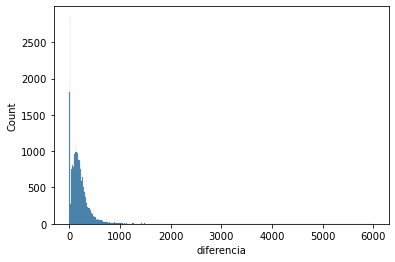

In [13]:
sb.histplot(df["diferencia"]);

**HISTOGRAMA DIFERENCIA SIN VALORES ATIPICOS**

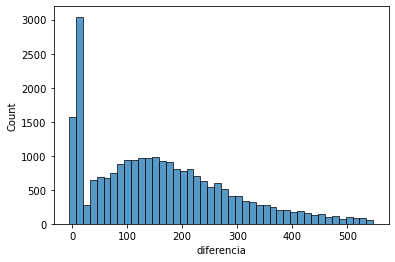

In [14]:
sb.histplot(df["diferencia"][df["diferencia"]<df["diferencia"].quantile(0.75)+1.5*(df["diferencia"].quantile(0.75)-df["diferencia"].quantile(0.25))]);

**MEDIA SIN VALORES ATIPICOS**

In [15]:
media=df["diferencia"][df["diferencia"]<df["diferencia"].quantile(0.75)+1.5*(df["diferencia"].quantile(0.75)-df["diferencia"].quantile(0.25))].mean()
np.round(media)

161.0

In [16]:
import datetime
df["qualification_date"][df["qualification_date"].isnull()]=df["entry_date"][df["qualification_date"].isnull()]+datetime.timedelta(days=161)
df.isnull().sum()

C:\Users\crist\AppData\Local\Temp/ipykernel_11320/2341895863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["qualification_date"][df["qualification_date"].isnull()]=df["entry_date"][df["qualification_date"].isnull()]+datetime.timedelta(days=161)


name                     0
type                     0
region                   0
owner                   25
typology                 0
typology_des             3
investment               0
entry_date               0
state                    0
qualification_date       0
id_project               0
latitude               184
longitude              184
n_docs                   0
n_addendum               0
n_participatory          0
main_url                 0
diferencia            1249
dtype: int64

## 2.4- Vuelvo a sacar la diferencia

In [17]:
df["diferencia"]=df["qualification_date"][df["qualification_date"].isnull()==False]-df["entry_date"][df["qualification_date"].isnull()==False]
df["diferencia"]=df["diferencia"].apply(lambda x: x.days)
df

,name,type,region,owner,typology,typology_des,investment,entry_date,state,qualification_date,id_project,latitude,longitude,n_docs,n_addendum,n_participatory,main_url,diferencia
0,Instalación Fibra Optica (desde Cerro Chapiqui...,DIA,Decimoquinta,Entel Chile S.A.,p,"Ejecución de obras, programas o actividades en...",3.000,1997-07-31,Aprobado,1997-10-14,10,-18.343267,-69.537667,2,0,0,https://seia.sea.gob.cl/expediente/expediente....,75
1,Planta Minera Doña Leonor,EIA,Cuarta,NaN,i4,Proyecto de desarrollo minero sobre 5000 tons/...,0.150,1995-12-11,Aprobado,1996-06-04,13,-31.723339,-70.935702,6,0,0,https://seia.sea.gob.cl/expediente/expediente....,176
2,Planta de Tratamiento de Aguas Servidas Median...,DIA,Quinta,Ilustre municipalidad de nogales,o4,Plantas de tratamiento de aguas de origen domi...,0.440,1997-09-01,Aprobado,1997-12-22,14,-32.697018,-71.210925,3,0,0,https://seia.sea.gob.cl/expediente/expediente....,112
3,Relleno Sanitario Sector Colihues - La Yesca,EIA,Sexta,Ilustre Municipalidad de Rancagua,o5,Plantas de tratamiento y/o disposición de resi...,0.170,1996-05-07,Aprobado,1996-11-15,15,-34.231782,-70.704146,7,0,0,https://seia.sea.gob.cl/expediente/expediente....,192
4,Planta de Cartulinas (CMPC),EIA,Séptima,Cartulinas CMPC SpA,m4,"Industrias de celulosas, de pasta de papel y d...",200.000,1995-10-16,Aprobado,1995-12-29,16,-35.606339,-71.593895,7,0,0,https://seia.sea.gob.cl/expediente/expediente....,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26948,Planta de Tratamiento de RILes de Inasec,DIA,RM,Industria Nacional de Secado Limitada,o7,Sistemas de tratamiento y/o disposición de res...,0.029,2021-02-25,Ingresados Art.94 RSEIA,2021-08-05,2150953207,NaN,NaN,2,0,0,https://seia.sea.gob.cl/expediente/expediente....,161
26949,"Aumento de Extracción y Procesamiento, Pozo El...",DIA,Novena,Forestal Arauco S.A.,i5,Proyectos de extracción de áridos y greda,0.500,2021-03-05,En Calificación,2021-08-13,2150963916,-39.391543,-72.597362,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161
26950,BALNEARIO FLUVIAL RÍO DAMAS,DIA,Décima,Inversiones y Comercial Southern World SpA,g2,Proyecto de desarrollo turístico (destinados e...,30.400,2021-03-09,En Calificación,2021-08-17,2151031299,-40.596800,-73.086346,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161
26951,Planta de tratamiento de aguas servidas de Mel...,DIA,Novena,alejandro arturo cancino esparza,o4,Plantas de tratamiento de aguas de origen domi...,2.000,2021-03-05,Ingresados Art.94 RSEIA,2021-08-13,2151056204,NaN,NaN,3,0,0,https://seia.sea.gob.cl/expediente/expediente....,161


## 2.5 Valores nulos - Las demas columnas - Se elimina
**No se puede hacer nada para las demas**

In [18]:
largo=df.shape[0]
df=df.dropna()
print ("Se elimina", largo-df.shape[0])

Se elimina 212


In [19]:
df.isnull().sum()

name                  0
type                  0
region                0
owner                 0
typology              0
typology_des          0
investment            0
entry_date            0
state                 0
qualification_date    0
id_project            0
latitude              0
longitude             0
n_docs                0
n_addendum            0
n_participatory       0
main_url              0
diferencia            0
dtype: int64

## 2.6 Verificacion el estaods de los ultimos 1000 proyectos

In [20]:
df=df.sort_values("qualification_date",ascending=False)
df

,name,type,region,owner,typology,typology_des,investment,entry_date,state,qualification_date,id_project,latitude,longitude,n_docs,n_addendum,n_participatory,main_url,diferencia
26950,BALNEARIO FLUVIAL RÍO DAMAS,DIA,Décima,Inversiones y Comercial Southern World SpA,g2,Proyecto de desarrollo turístico (destinados e...,30.4,2021-03-09,En Calificación,2021-08-17,2151031299,-40.596800,-73.086346,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161
26949,"Aumento de Extracción y Procesamiento, Pozo El...",DIA,Novena,Forestal Arauco S.A.,i5,Proyectos de extracción de áridos y greda,0.5,2021-03-05,En Calificación,2021-08-13,2150963916,-39.391543,-72.597362,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161
26946,CONTINUIDAD OPERACIONAL EXTRACCION ARIDOS RIO ...,DIA,RM,Compañia Minera Santa Laura Limitada,i5,Proyectos de extracción de áridos y greda,1.0,2021-03-02,En Calificación,2021-08-10,2150897519,-34.000000,-71.000000,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161
26945,Parque Fotovoltaico Andrómeda 2,DIA,Quinta,Solek Chile Services SpA,c,Centrales generadoras de energía mayores a 3 MW,5.0,2021-02-25,En Calificación,2021-08-05,2150870379,-32.793624,-70.557663,13,0,0,https://seia.sea.gob.cl/expediente/expediente....,161
26944,Parque Fotovoltaico Colmo,DIA,Quinta,Solek Chile Services SpA,c,Centrales generadoras de energía mayores a 3 MW,10.0,2021-02-24,En Calificación,2021-08-04,2150870374,-32.892685,-71.452305,18,0,0,https://seia.sea.gob.cl/expediente/expediente....,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,Ulexita Granulada,EIA,Segunda,QUIBORAX S.A.,k1,Instalaciones fabriles sobre 2000 KVA,2.0,1993-06-15,Aprobado,1993-10-08,885,-23.587648,-70.256246,4,0,0,https://seia.sea.gob.cl/expediente/expediente....,115
568,Planta Integrada Productos Tissue,EIA,RM,CMPC Tissue S.A.,m4,"Industrias de celulosas, de pasta de papel y d...",60.0,1993-04-02,Aprobado,1993-09-16,1036,-33.706950,-70.935728,8,1,0,https://seia.sea.gob.cl/expediente/expediente....,167
8195,Fundición REFIMET Antofagasta,EIA,Segunda,FUNDICION REFIMET S.A.,t,Ingreso voluntario,60.0,1992-06-13,Aprobado,1993-09-13,903427,-23.820454,-70.315629,3,0,0,https://seia.sea.gob.cl/expediente/expediente....,457
2413,Guanaco,EIA,Segunda,Amax Gold de Chile Ltda.,i4,Proyecto de desarrollo minero sobre 5000 tons/...,70.0,1992-02-02,Aprobado,1993-07-22,3023,-25.107841,-69.545514,2,0,0,https://seia.sea.gob.cl/expediente/expediente....,536


In [21]:
df["state"].value_counts()

Aprobado                     16944
No Admitido a Tramitación     3886
Desistido                     3550
Rechazado                     1170
En Calificación                524
No calificado                  508
Abandonado                      77
Caducado                        67
Revocado                        14
En Admisión                      1
Name: state, dtype: int64

## 2.7 Validación de las clases

In [22]:
df2=df.iloc[:1000,:]

**No ejecuto la celda para no volver a procesar, por el tiempo. Guarde los datos y despues lo carge**

In [ ]:
estado=[]
for y in range(len(df2)):
    r = requests.get(df2["main_url"].iloc[y])
    soup = BeautifulSoup(r.text, "html.parser")
    a=soup.find_all(class_="tabla_datos_linea")
    total=a[1].find_all('td')
    for i in range(len(total)):
        if total[i].text=="Estado Actual":
            print (total[i+1].text, y)
            estado.extend([total[i+1].text]+[df2["id_project"].iloc[y]])
            break#a.find_all("Estado Actual")

### 2.7.1 Transformo a dataframe y guardo

In [ ]:
actualizado=pd.DataFrame(np.array(estado).reshape(1000,2))
actualizado.columns=["Estado","id"]
actualizado.to_excel("actualizado2.xlsx")

In [ ]:
actualizado["id"]=pd.to_numeric(actualizado["id"])

In [23]:
actualizado=pd.read_excel("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/actualizado2.xlsx",header=0)

### 2.7.2 Uno los data set

In [24]:
df_junto=pd.merge(df,actualizado,left_on="id_project",right_on="id")

In [25]:
df_junto

,name,type,region,owner,typology,typology_des,investment,entry_date,state,qualification_date,...,latitude,longitude,n_docs,n_addendum,n_participatory,main_url,diferencia,Unnamed: 0,Estado,id
0,BALNEARIO FLUVIAL RÍO DAMAS,DIA,Décima,Inversiones y Comercial Southern World SpA,g2,Proyecto de desarrollo turístico (destinados e...,30.4000,2021-03-09,En Calificación,2021-08-17,...,-40.596800,-73.086346,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,0,Desistido,2151031299
1,"Aumento de Extracción y Procesamiento, Pozo El...",DIA,Novena,Forestal Arauco S.A.,i5,Proyectos de extracción de áridos y greda,0.5000,2021-03-05,En Calificación,2021-08-13,...,-39.391543,-72.597362,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,1,Aprobado,2150963916
2,CONTINUIDAD OPERACIONAL EXTRACCION ARIDOS RIO ...,DIA,RM,Compañia Minera Santa Laura Limitada,i5,Proyectos de extracción de áridos y greda,1.0000,2021-03-02,En Calificación,2021-08-10,...,-34.000000,-71.000000,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,2,Aprobado,2150897519
3,Parque Fotovoltaico Andrómeda 2,DIA,Quinta,Solek Chile Services SpA,c,Centrales generadoras de energía mayores a 3 MW,5.0000,2021-02-25,En Calificación,2021-08-05,...,-32.793624,-70.557663,13,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,3,Desistido,2150870379
4,Parque Fotovoltaico Colmo,DIA,Quinta,Solek Chile Services SpA,c,Centrales generadoras de energía mayores a 3 MW,10.0000,2021-02-24,En Calificación,2021-08-04,...,-32.892685,-71.452305,18,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,4,Desistido,2150870374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Condominio Alto Arrayán,DIA,Octava,Constructora PACAL S.A,h1,Proyectos inmobiliarios,13.4697,2019-12-20,Aprobado,2020-06-22,...,-37.465062,-72.338331,69,2,0,https://seia.sea.gob.cl/expediente/expediente....,185,995,Aprobado,2145207692
996,Lira 2488,DIA,RM,Inmobiliaria Lira SPA,h1,Proyectos inmobiliarios,29.0000,2020-01-15,Aprobado,2020-06-22,...,-33.477317,-70.630008,62,2,0,https://seia.sea.gob.cl/expediente/expediente....,159,994,Aprobado,2145399823
997,Edificio de Viviendas Santo Domingo,DIA,RM,Inmobiliaria SD SpA.,h1,Proyectos inmobiliarios,31.1120,2019-09-04,Aprobado,2020-06-22,...,-33.436917,-70.660640,73,2,0,https://seia.sea.gob.cl/expediente/expediente....,292,993,Aprobado,2144112428
998,Fusión y Relocalización: Centro de cultivo de ...,DIA,Duodécima,Nova Austral S.A.,n3,Producción anual igual o mayor a (35ton) tratá...,5.5000,2020-01-10,En Calificación,2020-06-19,...,-54.120265,-71.854878,58,2,0,https://seia.sea.gob.cl/expediente/expediente....,161,998,En Calificación,2145372043


In [26]:
df_junto["comprobar"]=df_junto["state"]==df_junto["Estado"]
df_junto

,name,type,region,owner,typology,typology_des,investment,entry_date,state,qualification_date,...,longitude,n_docs,n_addendum,n_participatory,main_url,diferencia,Unnamed: 0,Estado,id,comprobar
0,BALNEARIO FLUVIAL RÍO DAMAS,DIA,Décima,Inversiones y Comercial Southern World SpA,g2,Proyecto de desarrollo turístico (destinados e...,30.4000,2021-03-09,En Calificación,2021-08-17,...,-73.086346,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,0,Desistido,2151031299,False
1,"Aumento de Extracción y Procesamiento, Pozo El...",DIA,Novena,Forestal Arauco S.A.,i5,Proyectos de extracción de áridos y greda,0.5000,2021-03-05,En Calificación,2021-08-13,...,-72.597362,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,1,Aprobado,2150963916,False
2,CONTINUIDAD OPERACIONAL EXTRACCION ARIDOS RIO ...,DIA,RM,Compañia Minera Santa Laura Limitada,i5,Proyectos de extracción de áridos y greda,1.0000,2021-03-02,En Calificación,2021-08-10,...,-71.000000,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,2,Aprobado,2150897519,False
3,Parque Fotovoltaico Andrómeda 2,DIA,Quinta,Solek Chile Services SpA,c,Centrales generadoras de energía mayores a 3 MW,5.0000,2021-02-25,En Calificación,2021-08-05,...,-70.557663,13,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,3,Desistido,2150870379,False
4,Parque Fotovoltaico Colmo,DIA,Quinta,Solek Chile Services SpA,c,Centrales generadoras de energía mayores a 3 MW,10.0000,2021-02-24,En Calificación,2021-08-04,...,-71.452305,18,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,4,Desistido,2150870374,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Condominio Alto Arrayán,DIA,Octava,Constructora PACAL S.A,h1,Proyectos inmobiliarios,13.4697,2019-12-20,Aprobado,2020-06-22,...,-72.338331,69,2,0,https://seia.sea.gob.cl/expediente/expediente....,185,995,Aprobado,2145207692,True
996,Lira 2488,DIA,RM,Inmobiliaria Lira SPA,h1,Proyectos inmobiliarios,29.0000,2020-01-15,Aprobado,2020-06-22,...,-70.630008,62,2,0,https://seia.sea.gob.cl/expediente/expediente....,159,994,Aprobado,2145399823,True
997,Edificio de Viviendas Santo Domingo,DIA,RM,Inmobiliaria SD SpA.,h1,Proyectos inmobiliarios,31.1120,2019-09-04,Aprobado,2020-06-22,...,-70.660640,73,2,0,https://seia.sea.gob.cl/expediente/expediente....,292,993,Aprobado,2144112428,True
998,Fusión y Relocalización: Centro de cultivo de ...,DIA,Duodécima,Nova Austral S.A.,n3,Producción anual igual o mayor a (35ton) tratá...,5.5000,2020-01-10,En Calificación,2020-06-19,...,-71.854878,58,2,0,https://seia.sea.gob.cl/expediente/expediente....,161,998,En Calificación,2145372043,True


### 2.7.3 Validación

In [27]:
df_junto["state"][df_junto["comprobar"]==False].value_counts()

En Calificación              427
Aprobado                       3
En Admisión                    1
No Admitido a Tramitación      1
Name: state, dtype: int64

**De state cambio al estado**

In [28]:
df_junto["Estado"][df_junto["comprobar"]==False].value_counts()

Aprobado           323
Desistido           78
Rechazado           25
No calificado        4
En Calificación      2
Name: Estado, dtype: int64

**Variables que no cambiaron**

In [29]:
df_junto["state"][df_junto["comprobar"]!=False].value_counts()

Aprobado                     329
Desistido                    107
No Admitido a Tramitación     55
En Calificación               42
No calificado                 26
Rechazado                      9
Name: state, dtype: int64

In [30]:
df2["state"].value_counts()

En Calificación              469
Aprobado                     332
Desistido                    107
No Admitido a Tramitación     56
No calificado                 26
Rechazado                      9
En Admisión                    1
Name: state, dtype: int64

In [31]:
print (df2["entry_date"].min(),"-",df2["entry_date"].max())

2016-02-08 00:00:00 - 2021-03-09 00:00:00


**CONCLUSION**  
Por lo tanto, Aprobado solo cambio 3 de 329, no las buscare, desistido no cambio ninguno, no admitido a tramitacion solo cambbio uno, no calicado no cambio y rechazado tampoco  
**Solo buscare "EN calificacion y en admision**

In [32]:
df["state"].value_counts()

Aprobado                     16944
No Admitido a Tramitación     3886
Desistido                     3550
Rechazado                     1170
En Calificación                524
No calificado                  508
Abandonado                      77
Caducado                        67
Revocado                        14
En Admisión                      1
Name: state, dtype: int64

## 2.8 Reemplazo por los estados nuevos

In [33]:
df_junto[df_junto["comprobar"]==False]["id"]
for i in range(len(df_junto[df_junto["comprobar"]==False])):
    id=df_junto[df_junto["comprobar"]==False]["id"].iloc[i]
    df.loc[df["id_project"]==id,"state"]=df_junto[df_junto["comprobar"]==False]["Estado"].iloc[i]

In [34]:
df["state"].value_counts()

Aprobado                     17264
No Admitido a Tramitación     3885
Desistido                     3628
Rechazado                     1195
No calificado                  512
En Calificación                 99
Abandonado                      77
Caducado                        67
Revocado                        14
Name: state, dtype: int64

## 2.9 Verifico lo valores de "En calificacion", "Abandonado", "Caducado" y "Revocado"

In [35]:
df3=df[(df["state"]=="En Calificación") |(df["state"]=="Abandonado") |(df["state"]=="Caducado") |(df["state"]=="Revocado") ]

In [ ]:
estado=[]
for y in range(len(df3)):
    r = requests.get(df3["main_url"].iloc[y])
    soup = BeautifulSoup(r.text, "html.parser")
    a=soup.find_all(class_="tabla_datos_linea")
    total=a[1].find_all('td')
    for i in range(len(total)):
        if total[i].text=="Estado Actual":
            print (total[i+1].text, y)
            estado.extend([total[i+1].text]+[df3["id_project"].iloc[y]])
            break#a.find_all("Estado Actual")

In [ ]:
actualizado=pd.DataFrame(np.array(estado).reshape(257,2))
actualizado.columns=["Estado","id"]
actualizado.to_excel("actualizado3.xlsx")
actualizado["id"]=pd.to_numeric(actualizado["id"])

### 2.9.1 Uno los dataset

In [36]:
actualizado=pd.read_excel("c:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/actualizado3.xlsx",header=0)


In [37]:
df_junto2=pd.merge(df,actualizado,left_on="id_project",right_on="id")

In [38]:
df_junto2["comprobar"]=df_junto2["state"]==df_junto2["Estado"]
df_junto2

,name,type,region,owner,typology,typology_des,investment,entry_date,state,qualification_date,...,longitude,n_docs,n_addendum,n_participatory,main_url,diferencia,Unnamed: 0,Estado,id,comprobar
0,Centro de eventos Les Bourgeois,DIA,Quinta,Rubén Sergio Bourgeois Navia,h1,Proyectos inmobiliarios,0.40,2021-02-23,En Calificación,2021-08-03,...,-71.476195,14,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,0,En Calificación,2150822599,True
1,AMPLIACION PLANTA SAN JOSE,DIA,Décima,Salmones Camanchaca S.A.,n6,Plantas Procesadoras de recursos hidrobiológicos,1.00,2021-02-19,En Calificación,2021-07-30,...,-73.191714,13,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,1,En Calificación,2150864739,True
2,PISCICULTURA SAN PABLO,DIA,Interregional,Inversiones Metahue S.A.,n5,Producción anual de engorda de peces 8 ton o c...,10.00,2021-01-25,En Calificación,2021-07-05,...,-72.995223,58,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,2,En Calificación,2149399777,True
3,Parque Eólico Don Álvaro,DIA,Octava,Energía Eólica Don Álvaro SpA,c,Centrales generadoras de energía mayores a 3 MW,154.00,2021-01-22,En Calificación,2021-07-02,...,-72.520221,46,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,3,En Calificación,2149701106,True
4,Parque Solar Cordillera,EIA,RM,ECO SANTIAGO SPA,c,Centrales generadoras de energía mayores a 3 MW,315.00,2021-01-07,En Calificación,2021-06-17,...,-70.463402,44,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,4,En Calificación,2149455473,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Centro de Cultivo de Salmonídeos Río Tornagale...,DIA,Decimocuarta,Prieto Vial Ugarte y Cia. Ltda.,n3,Producción anual igual o mayor a (35ton) tratá...,0.15,1997-10-03,Abandonado,1998-03-13,...,-73.350746,2,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,252,Abandonado,61,True
253,Centro de Cultivo de Salmonídeos Río Tornagale...,DIA,Decimocuarta,Prieto Vial Ugarte y Cia. Ltda.,n3,Producción anual igual o mayor a (35ton) tratá...,0.18,1997-10-03,Abandonado,1998-03-13,...,-73.341021,2,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,253,Abandonado,60,True
254,Extracción Áridos Mauco,DIA,Quinta,Agroforestal Mauco Ltda.,i1,Extracción de pozos o canteras,6.86,1997-09-22,Abandonado,1998-03-02,...,-71.395423,3,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,254,Abandonado,86,True
255,Estación de Transferencia San Eugenio de Resid...,EIA,RM,Generale Des Eaux,o5,Plantas de tratamiento y/o disposición de resi...,5.00,1995-08-01,Abandonado,1996-01-09,...,-70.660866,1,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,255,Abandonado,1040,True


In [39]:
df_junto2[df_junto2["comprobar"]==False]

,name,type,region,owner,typology,typology_des,investment,entry_date,state,qualification_date,...,longitude,n_docs,n_addendum,n_participatory,main_url,diferencia,Unnamed: 0,Estado,id,comprobar
47,Instalaciones Complementarias Instituto Gurdjieff,DIA,RM,SOCIEDAD INMOBILIARIA EDUCACIONAL LA REINA S.A.,h1,Proyectos inmobiliarios,1.5000,2020-01-06,En Calificación,2020-06-15,...,-70.978399,76,2,0,https://seia.sea.gob.cl/expediente/expediente....,161,47,Desistido,2145337603,False
48,"Desarrollo Inmobiliario Macro Pilauco II, Etapa 2",DIA,Décima,Galilea de Ingeniería y Construcción,h1,Proyectos inmobiliarios,68.6200,2019-12-30,En Calificación,2020-06-08,...,-73.118150,59,1,0,https://seia.sea.gob.cl/expediente/expediente....,161,48,Aprobado,2145296018,False
49,Planta Fotovoltaica Jardín Solar,DIA,Primera,Colbún S.A.,c,Centrales generadoras de energía mayores a 3 MW,430.0000,2019-12-20,En Calificación,2020-05-29,...,-69.722123,45,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,49,Aprobado,2145240833,False
51,Parque Solar Cabrero,DIA,Octava,IMPULSO SOLAR EL RESPLANDOR SpA,c,Centrales generadoras de energía mayores a 3 MW,15.5000,2019-12-20,En Calificación,2020-05-29,...,-72.380844,77,1,0,https://seia.sea.gob.cl/expediente/expediente....,161,51,Rechazado,2145237905,False
53,Línea de Respaldo de 44 kV Metro de Valparaíso,DIA,Quinta,Metro Regional de Valparaíso S.A.,b1,Líneas de transmisión eléctrica de alto voltaje,4.5000,2019-12-19,En Calificación,2020-05-28,...,-71.406594,110,2,0,https://seia.sea.gob.cl/expediente/expediente....,161,53,Aprobado,2145207533,False
54,Planta de Hormigón Premezclado Santiago Sur,DIA,RM,INVERSIONES ORANGE S.A.,e3,Terminales de camiones,75.0000,2019-12-18,En Calificación,2020-05-27,...,-70.695140,92,2,0,https://seia.sea.gob.cl/expediente/expediente....,161,54,Aprobado,2145206782,False
57,CENTRO DE ENGORDA DE SALMÓNIDOS SENO GALVARINO...,DIA,Duodécima,Acuícola Cordillera Ltda.,n3,Producción anual igual o mayor a (35ton) tratá...,7.2071,2019-11-26,En Calificación,2020-05-05,...,-72.732447,58,1,0,https://seia.sea.gob.cl/expediente/expediente....,161,57,Aprobado,2145051998,False
58,Extracción Mecanizada de Aridos Río Cachapoal,DIA,Sexta,Sociedad de Inversiones El Milagro ABO SpA,i5,Proyectos de extracción de áridos y greda,0.7700,2019-11-22,En Calificación,2020-05-01,...,-70.923220,84,2,0,https://seia.sea.gob.cl/expediente/expediente....,161,58,Aprobado,2144907407,False
59,Actualización Proyecto Minero División Radomir...,DIA,Segunda,"CODELCO Chile, División Radomiro Tomic",i1,Proyectos de desarrollo minero sobre 5.000 ton...,882.0000,2019-11-21,En Calificación,2020-04-30,...,-68.886839,98,2,0,https://seia.sea.gob.cl/expediente/expediente....,161,59,Aprobado,2144976823,False
60,Centro de Cultivo de Salmónidos Sur Islotes Be...,DIA,Duodécima,CULTIVOS OTWAY S.A.,n3,Producción anual igual o mayor a (35ton) tratá...,23.1000,2019-11-13,En Calificación,2020-04-22,...,-73.564295,39,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,60,Rechazado,2144909968,False


In [40]:
df_junto2[df_junto2["comprobar"]==False]["id"]
print (len(df_junto2[df_junto2["comprobar"]==False]))
for i in range(len(df_junto2[df_junto2["comprobar"]==False])):
    id=df_junto2[df_junto2["comprobar"]==False]["id"].iloc[i]
    df.loc[df["id_project"]==id,"state"]=df_junto2[df_junto2["comprobar"]==False]["Estado"].iloc[i]

38


In [41]:
df["state"].value_counts()

Aprobado                     17287
No Admitido a Tramitación     3885
Desistido                     3635
Rechazado                     1203
No calificado                  512
Abandonado                      77
Caducado                        67
En Calificación                 61
Revocado                        14
Name: state, dtype: int64

## 2.10 Elimino los que estan en calificación

In [42]:
df=df[df["state"]!="En Calificación"]
df

,name,type,region,owner,typology,typology_des,investment,entry_date,state,qualification_date,id_project,latitude,longitude,n_docs,n_addendum,n_participatory,main_url,diferencia
26950,BALNEARIO FLUVIAL RÍO DAMAS,DIA,Décima,Inversiones y Comercial Southern World SpA,g2,Proyecto de desarrollo turístico (destinados e...,30.4,2021-03-09,Desistido,2021-08-17,2151031299,-40.596800,-73.086346,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161
26949,"Aumento de Extracción y Procesamiento, Pozo El...",DIA,Novena,Forestal Arauco S.A.,i5,Proyectos de extracción de áridos y greda,0.5,2021-03-05,Aprobado,2021-08-13,2150963916,-39.391543,-72.597362,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161
26946,CONTINUIDAD OPERACIONAL EXTRACCION ARIDOS RIO ...,DIA,RM,Compañia Minera Santa Laura Limitada,i5,Proyectos de extracción de áridos y greda,1.0,2021-03-02,Aprobado,2021-08-10,2150897519,-34.000000,-71.000000,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161
26945,Parque Fotovoltaico Andrómeda 2,DIA,Quinta,Solek Chile Services SpA,c,Centrales generadoras de energía mayores a 3 MW,5.0,2021-02-25,Desistido,2021-08-05,2150870379,-32.793624,-70.557663,13,0,0,https://seia.sea.gob.cl/expediente/expediente....,161
26944,Parque Fotovoltaico Colmo,DIA,Quinta,Solek Chile Services SpA,c,Centrales generadoras de energía mayores a 3 MW,10.0,2021-02-24,Desistido,2021-08-04,2150870374,-32.892685,-71.452305,18,0,0,https://seia.sea.gob.cl/expediente/expediente....,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,Ulexita Granulada,EIA,Segunda,QUIBORAX S.A.,k1,Instalaciones fabriles sobre 2000 KVA,2.0,1993-06-15,Aprobado,1993-10-08,885,-23.587648,-70.256246,4,0,0,https://seia.sea.gob.cl/expediente/expediente....,115
568,Planta Integrada Productos Tissue,EIA,RM,CMPC Tissue S.A.,m4,"Industrias de celulosas, de pasta de papel y d...",60.0,1993-04-02,Aprobado,1993-09-16,1036,-33.706950,-70.935728,8,1,0,https://seia.sea.gob.cl/expediente/expediente....,167
8195,Fundición REFIMET Antofagasta,EIA,Segunda,FUNDICION REFIMET S.A.,t,Ingreso voluntario,60.0,1992-06-13,Aprobado,1993-09-13,903427,-23.820454,-70.315629,3,0,0,https://seia.sea.gob.cl/expediente/expediente....,457
2413,Guanaco,EIA,Segunda,Amax Gold de Chile Ltda.,i4,Proyecto de desarrollo minero sobre 5000 tons/...,70.0,1992-02-02,Aprobado,1993-07-22,3023,-25.107841,-69.545514,2,0,0,https://seia.sea.gob.cl/expediente/expediente....,536


## 2.11 Creo nueva clase

In [43]:
df["state"].value_counts()

Aprobado                     17287
No Admitido a Tramitación     3885
Desistido                     3635
Rechazado                     1203
No calificado                  512
Abandonado                      77
Caducado                        67
Revocado                        14
Name: state, dtype: int64

In [44]:
df["state_new"]="Desaprobado"
df.loc[df["state"]=="Aprobado","state_new"]="Aprobado"
df

C:\Users\crist\AppData\Local\Temp/ipykernel_11320/192677683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["state_new"]="Desaprobado"
C:\Users\crist\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,name,type,region,owner,typology,typology_des,investment,entry_date,state,qualification_date,id_project,latitude,longitude,n_docs,n_addendum,n_participatory,main_url,diferencia,state_new
26950,BALNEARIO FLUVIAL RÍO DAMAS,DIA,Décima,Inversiones y Comercial Southern World SpA,g2,Proyecto de desarrollo turístico (destinados e...,30.4,2021-03-09,Desistido,2021-08-17,2151031299,-40.596800,-73.086346,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,Desaprobado
26949,"Aumento de Extracción y Procesamiento, Pozo El...",DIA,Novena,Forestal Arauco S.A.,i5,Proyectos de extracción de áridos y greda,0.5,2021-03-05,Aprobado,2021-08-13,2150963916,-39.391543,-72.597362,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,Aprobado
26946,CONTINUIDAD OPERACIONAL EXTRACCION ARIDOS RIO ...,DIA,RM,Compañia Minera Santa Laura Limitada,i5,Proyectos de extracción de áridos y greda,1.0,2021-03-02,Aprobado,2021-08-10,2150897519,-34.000000,-71.000000,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,Aprobado
26945,Parque Fotovoltaico Andrómeda 2,DIA,Quinta,Solek Chile Services SpA,c,Centrales generadoras de energía mayores a 3 MW,5.0,2021-02-25,Desistido,2021-08-05,2150870379,-32.793624,-70.557663,13,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,Desaprobado
26944,Parque Fotovoltaico Colmo,DIA,Quinta,Solek Chile Services SpA,c,Centrales generadoras de energía mayores a 3 MW,10.0,2021-02-24,Desistido,2021-08-04,2150870374,-32.892685,-71.452305,18,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,Desaprobado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,Ulexita Granulada,EIA,Segunda,QUIBORAX S.A.,k1,Instalaciones fabriles sobre 2000 KVA,2.0,1993-06-15,Aprobado,1993-10-08,885,-23.587648,-70.256246,4,0,0,https://seia.sea.gob.cl/expediente/expediente....,115,Aprobado
568,Planta Integrada Productos Tissue,EIA,RM,CMPC Tissue S.A.,m4,"Industrias de celulosas, de pasta de papel y d...",60.0,1993-04-02,Aprobado,1993-09-16,1036,-33.706950,-70.935728,8,1,0,https://seia.sea.gob.cl/expediente/expediente....,167,Aprobado
8195,Fundición REFIMET Antofagasta,EIA,Segunda,FUNDICION REFIMET S.A.,t,Ingreso voluntario,60.0,1992-06-13,Aprobado,1993-09-13,903427,-23.820454,-70.315629,3,0,0,https://seia.sea.gob.cl/expediente/expediente....,457,Aprobado
2413,Guanaco,EIA,Segunda,Amax Gold de Chile Ltda.,i4,Proyecto de desarrollo minero sobre 5000 tons/...,70.0,1992-02-02,Aprobado,1993-07-22,3023,-25.107841,-69.545514,2,0,0,https://seia.sea.gob.cl/expediente/expediente....,536,Aprobado


## 2.12 Cambio nombre de regiones

In [45]:
df["Region"]=""
df.loc[df["region"]=="Primera","Region"]="Región de Tarapacá"
df.loc[df["region"]=="Segunda","Region"]="Región de Antofagasta"
df.loc[df["region"]=="Tercera","Region"]="Región de Atacama"
df.loc[df["region"]=="Cuarta","Region"]="Región de Coquimbo"
df.loc[df["region"]=="Quinta","Region"]="Región de Valparaíso"
df.loc[df["region"]=="Sexta","Region"]="Región del Libertador Bernardo O'Higgins"
df.loc[df["region"]=="Séptima","Region"]="Región del Maule"
df.loc[df["region"]=="Octava","Region"]="Región del Bío-Bío"
df.loc[df["region"]=="Novena","Region"]="Región de La Araucanía"
df.loc[df["region"]=="Décima","Region"]="Región de Los Lagos"
df.loc[df["region"]=="Undécima","Region"]="Región de Aysén del Gral.Ibañez del Campo"
df.loc[df["region"]=="Duodécima","Region"]="Región de Magallanes y Antártica Chilena"
df.loc[df["region"]=="Decimocuarta","Region"]="Región de Los Ríos"
df.loc[df["region"]=="Decimoquinta","Region"]="Región de Arica y Parinacota"
df.loc[df["region"]=="Décimosexta","Region"]="Región de Ñuble"
df.loc[df["region"]=="Interregional","Region"]="Zona sin demarcar"
df.loc[df["region"]=="RM","Region"]="Región Metropolitana de Santiago"

C:\Users\crist\AppData\Local\Temp/ipykernel_11320/90727285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Region"]=""
C:\Users\crist\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [46]:
df["zona"]=""
df.loc[(df["Region"]=="Región de Arica y Parinacota")|(df["Region"]=="Región de Tarapacá")|
   (df["Region"]=="Región de Antofagasta")|(df["Region"]=="Región de Atacama")|
       (df["Region"]=="Región de Coquimbo"),"zona"]="Zona Norte"
df.loc[(df["Region"]=="Región del Bío-Bío")|(df["Region"]=="Región de La Araucanía")|
       (df["Region"]=="Región de Los Lagos")|(df["Region"]=="Región de Aysén del Gral.Ibañez del Campo")|
       (df["Region"]=="Región de Los Ríos")|(df["Region"]=="Región de Magallanes y Antártica Chilena")|
       (df["Region"]=="Región de Ñuble")  
       ,"zona"]="Zona sur"
df.loc[(df["Region"]=="Región del Libertador Bernardo O'Higgins")|(df["Region"]=="Región del Maule")|
   (df["Region"]=="Región de Valparaíso")|(df["Region"]=="Región Metropolitana de Santiago") 
       ,"zona"]="Zona centro"
df.loc[(df["Region"]=="Zona sin demarcar","zona")]="interregional"

C:\Users\crist\AppData\Local\Temp/ipykernel_11320/3525020291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["zona"]=""


## 2.13 Agrego año en que finazo el proyecto

In [47]:
df["año"]=df["qualification_date"].dt.year
df

C:\Users\crist\AppData\Local\Temp/ipykernel_11320/748881099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["año"]=df["qualification_date"].dt.year


,name,type,region,owner,typology,typology_des,investment,entry_date,state,qualification_date,...,longitude,n_docs,n_addendum,n_participatory,main_url,diferencia,state_new,Region,zona,año
26950,BALNEARIO FLUVIAL RÍO DAMAS,DIA,Décima,Inversiones y Comercial Southern World SpA,g2,Proyecto de desarrollo turístico (destinados e...,30.4,2021-03-09,Desistido,2021-08-17,...,-73.086346,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,Desaprobado,Región de Los Lagos,Zona sur,2021
26949,"Aumento de Extracción y Procesamiento, Pozo El...",DIA,Novena,Forestal Arauco S.A.,i5,Proyectos de extracción de áridos y greda,0.5,2021-03-05,Aprobado,2021-08-13,...,-72.597362,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,Aprobado,Región de La Araucanía,Zona sur,2021
26946,CONTINUIDAD OPERACIONAL EXTRACCION ARIDOS RIO ...,DIA,RM,Compañia Minera Santa Laura Limitada,i5,Proyectos de extracción de áridos y greda,1.0,2021-03-02,Aprobado,2021-08-10,...,-71.000000,9,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,Aprobado,Región Metropolitana de Santiago,Zona centro,2021
26945,Parque Fotovoltaico Andrómeda 2,DIA,Quinta,Solek Chile Services SpA,c,Centrales generadoras de energía mayores a 3 MW,5.0,2021-02-25,Desistido,2021-08-05,...,-70.557663,13,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,Desaprobado,Región de Valparaíso,Zona centro,2021
26944,Parque Fotovoltaico Colmo,DIA,Quinta,Solek Chile Services SpA,c,Centrales generadoras de energía mayores a 3 MW,10.0,2021-02-24,Desistido,2021-08-04,...,-71.452305,18,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,Desaprobado,Región de Valparaíso,Zona centro,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,Ulexita Granulada,EIA,Segunda,QUIBORAX S.A.,k1,Instalaciones fabriles sobre 2000 KVA,2.0,1993-06-15,Aprobado,1993-10-08,...,-70.256246,4,0,0,https://seia.sea.gob.cl/expediente/expediente....,115,Aprobado,Región de Antofagasta,Zona Norte,1993
568,Planta Integrada Productos Tissue,EIA,RM,CMPC Tissue S.A.,m4,"Industrias de celulosas, de pasta de papel y d...",60.0,1993-04-02,Aprobado,1993-09-16,...,-70.935728,8,1,0,https://seia.sea.gob.cl/expediente/expediente....,167,Aprobado,Región Metropolitana de Santiago,Zona centro,1993
8195,Fundición REFIMET Antofagasta,EIA,Segunda,FUNDICION REFIMET S.A.,t,Ingreso voluntario,60.0,1992-06-13,Aprobado,1993-09-13,...,-70.315629,3,0,0,https://seia.sea.gob.cl/expediente/expediente....,457,Aprobado,Región de Antofagasta,Zona Norte,1993
2413,Guanaco,EIA,Segunda,Amax Gold de Chile Ltda.,i4,Proyecto de desarrollo minero sobre 5000 tons/...,70.0,1992-02-02,Aprobado,1993-07-22,...,-69.545514,2,0,0,https://seia.sea.gob.cl/expediente/expediente....,536,Aprobado,Región de Antofagasta,Zona Norte,1993


## 2.14 Elimino zona no definida

In [48]:
df[df["region"]=="Interregional"]

,name,type,region,owner,typology,typology_des,investment,entry_date,state,qualification_date,...,longitude,n_docs,n_addendum,n_participatory,main_url,diferencia,state_new,Region,zona,año
26176,Incorporación de nuevas rutas de transporte de...,DIA,Interregional,Transportes Hurcam Spa.,ñ5,Transporte por medios terrestres de sustancias...,7.0000,2020-04-02,Aprobado,2021-03-05,...,-69.999998,195,2,0,https://seia.sea.gob.cl/expediente/expediente....,337,Aprobado,Zona sin demarcar,interregional,2021
26437,PLANTA DE TRATAMIENTO DE AGUAS SERVIDAS DOMICI...,DIA,Interregional,Ilustre Municipalidad de Puyehue,o4,Plantas de tratamiento de aguas de origen domi...,3.2134,2020-09-25,Desistido,2021-03-05,...,-72.609465,73,0,0,https://seia.sea.gob.cl/expediente/expediente....,161,Desaprobado,Zona sin demarcar,interregional,2021
26171,Nuevo Campamento Carén - División El Teniente,DIA,Interregional,CODELCO CHILE DIVISIÓN EL TENIENTE,i1,Proyectos de desarrollo minero sobre 5.000 ton...,25.0000,2020-04-07,Aprobado,2021-02-15,...,-71.195945,108,2,0,https://seia.sea.gob.cl/expediente/expediente....,314,Aprobado,Zona sin demarcar,interregional,2021
26486,Transporte de ácido sulfúrico,DIA,Interregional,transjhurtado spa,ñ5,Transporte por medios terrestres de sustancias...,1.0000,2020-08-11,Aprobado,2021-01-19,...,-69.600681,161,2,0,https://seia.sea.gob.cl/expediente/expediente....,161,Aprobado,Zona sin demarcar,interregional,2021
26474,Actualizaciones de Ingeniería y Construcción O...,DIA,Interregional,CODELCO CHILE DIVISIÓN EL TENIENTE,i5,Proyectos de extracción de áridos y greda,473.0000,2020-08-07,Aprobado,2021-01-15,...,-71.168434,98,1,0,https://seia.sea.gob.cl/expediente/expediente....,161,Aprobado,Zona sin demarcar,interregional,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Sistema de Transmisión Colbun-Alto Jahuel 220 KV,EIA,Interregional,Colbún Transmisión SA,b1,Líneas de transmisión eléctrica de alto voltaje,72.0000,1996-04-30,Aprobado,1997-01-17,...,-71.381807,8,2,0,https://seia.sea.gob.cl/expediente/expediente....,262,Aprobado,Zona sin demarcar,interregional,1997
27,Caminos de Acceso y Líneas de Alta Tensión a l...,EIA,Interregional,Compañia Minera Nevada SpA,b1,Líneas de transmisión eléctrica de alto voltaje,46.0000,1996-03-19,Aprobado,1996-11-04,...,-71.048472,11,2,0,https://seia.sea.gob.cl/expediente/expediente....,230,Aprobado,Zona sin demarcar,interregional,1996
881,Minero Altamira,EIA,Interregional,Compañía Minera Altamira,i4,Proyecto de desarrollo minero sobre 5000 tons/...,40.0000,1996-03-22,Aprobado,1996-10-07,...,-69.855732,6,1,0,https://seia.sea.gob.cl/expediente/expediente....,199,Aprobado,Zona sin demarcar,interregional,1996
56,Líneas de Transmisión Charrua-Ancoa-Alto Jahuel,EIA,Interregional,TRANSELEC S.A.,b1,Líneas de transmisión eléctrica de alto voltaje,100.0000,1995-11-20,Aprobado,1996-07-10,...,-72.319664,8,1,0,https://seia.sea.gob.cl/expediente/expediente....,233,Aprobado,Zona sin demarcar,interregional,1996


In [49]:
df["region"].value_counts()

RM               4588
Décima           3735
Undécima         2566
Octava           1789
Segunda          1745
Séptima          1597
Duodécima        1540
Quinta           1482
Tercera          1265
Sexta            1235
Cuarta           1164
Novena            961
Primera           724
Decimocuarta      675
Interregional     662
Décimosexta       627
Decimoquinta      325
Name: region, dtype: int64

# Parte 3- Visualizaciones
## 3.1 Correlaciones

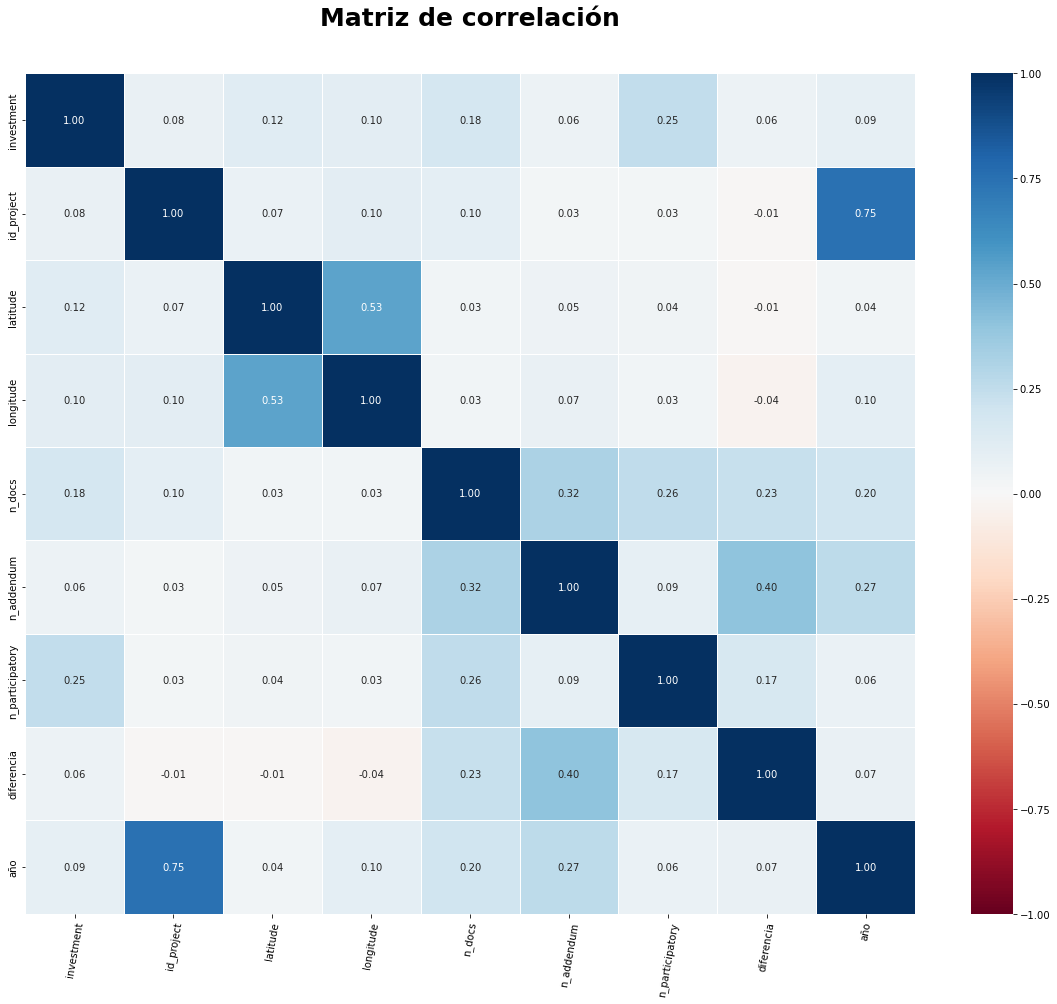

In [50]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,14))
plt.title('Matriz de correlación', y=1.05, size=25,fontweight="bold")
sb.heatmap(df.corr(),linewidths=0.5,
             cmap=colormap, linecolor='white', annot=True,fmt='.2f', vmin=-1)
plt.xticks(rotation=80)
plt.tight_layout()
#plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico12", transparent=True)
plt.show()

## 3.2 Diagrama de cajas

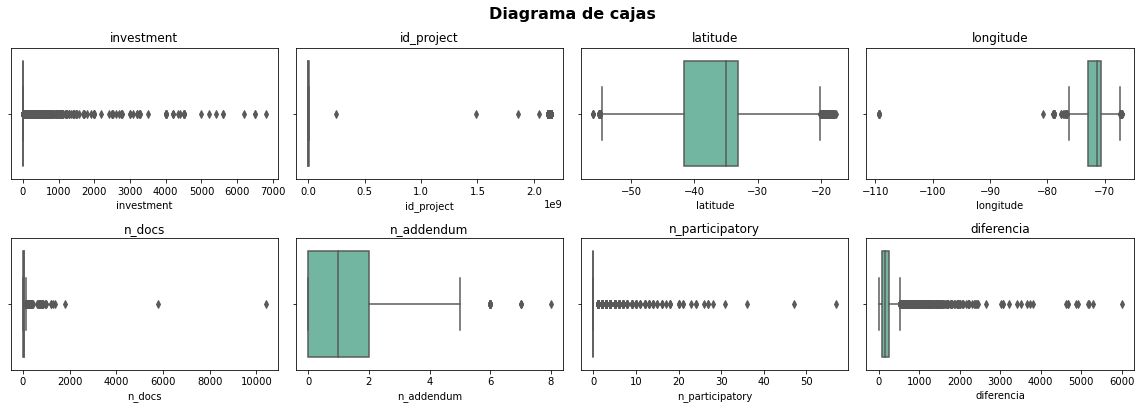

In [51]:
fig, axes = plt.subplots(2, 4, sharex=False,sharey=False, figsize=(16,8))
fig.suptitle('Diagrama de cajas', fontsize=16,fontweight="bold")

columna1=list(df.describe().columns)
p=0
for i in range(int(len(columna1)/4)):
    for y in range(int(len(columna1)/2)):
        plt.subplot(3,4,p+1)
        #plt.title(columna1[p])
        sb.boxplot(x=df[columna1[p]],palette="Set2")
        plt.title(columna1[p])
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
        p+=1
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico8", transparent=True)

## 3.2.1 Elimino los datos atipico del numero de documento

In [52]:
df=df[df["n_docs"]<2000]

## 3.3 Proporción de tipo de documento

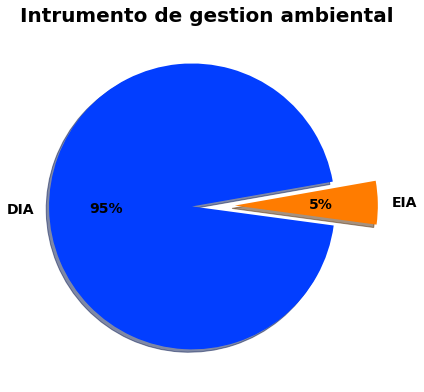

In [53]:
circular=pd.DataFrame(df["type"].value_counts())
#circular.index = pd.Series(['No cancelo',"Cancelo"])


colors = sb.color_palette('bright')
explode = [0.1,0.2]
plt.figure(figsize=[6,8])
plt.pie(circular["type"], colors = colors, autopct = '%0.0f%%', labels=list(circular.index)
        ,shadow = 'True',center = (0.1,0.4),startangle=10,pctdistance = 0.6, explode=explode,textprops={'size': 14, 'fontweight':'bold'})
plt.title("Intrumento de gestion ambiental",fontsize=20,fontweight="bold")
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico2", transparent=True)
plt.show()

## 3.4 Proporción del estado del proyecto

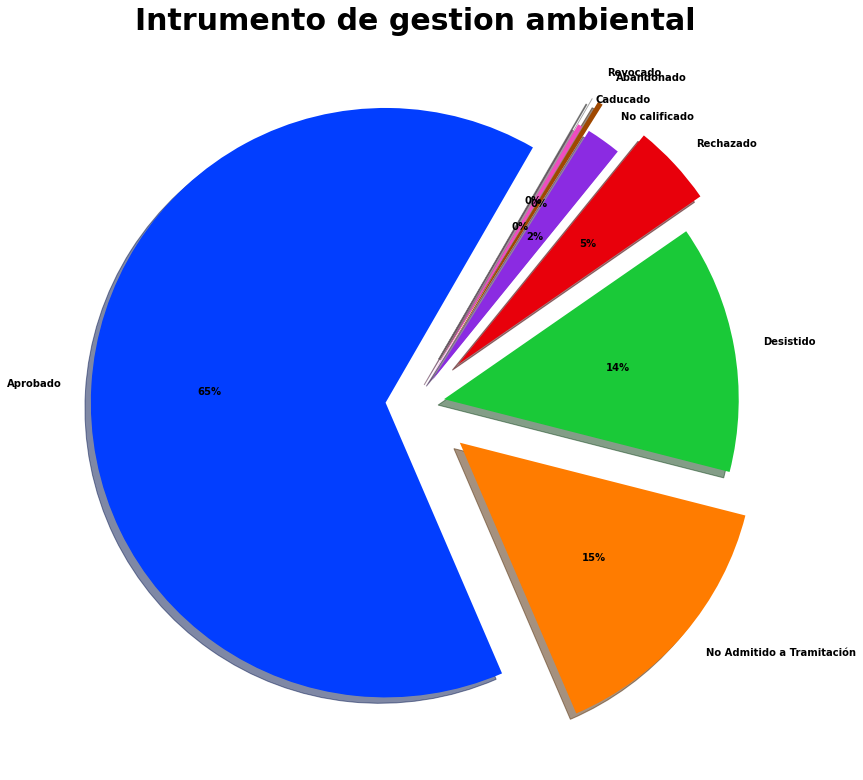

In [71]:
circular=pd.DataFrame(df["state"].value_counts())
#circular.index = pd.Series(['No cancelo',"Cancelo"])


colors = sb.color_palette('bright')
explode = [0.1,0.2,0.1,0.2,0.1,0.2,0.1,0.2]
plt.figure(figsize=[12,12])
plt.pie(circular["state"], colors = colors, autopct = '%0.0f%%', labels=list(circular.index)
        ,shadow = 'True',center = (0.1,0.4),startangle=60,pctdistance = 0.6, explode=explode,textprops={'size': 10, 'fontweight':'bold'})
plt.title("Intrumento de gestion ambiental",fontsize=30,fontweight="bold")
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico1", transparent=True)
plt.show()

## 3.5 Distribucín de las nuevas clases

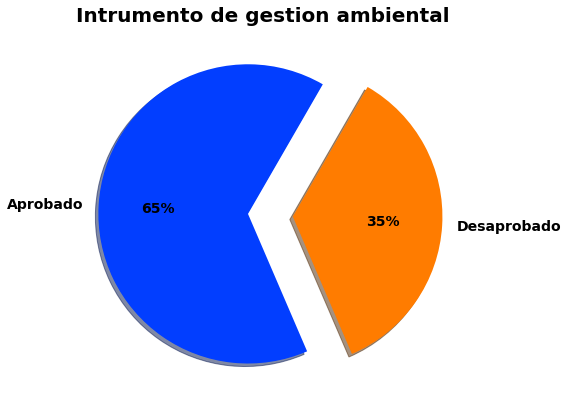

In [55]:
circular=pd.DataFrame(df["state_new"].value_counts())
#circular.index = pd.Series(['No cancelo',"Cancelo"])


colors = sb.color_palette('bright')
explode = [0.1,0.2]
plt.figure(figsize=[8,12])
plt.pie(circular["state_new"], colors = colors, autopct = '%0.0f%%', labels=list(circular.index)
        ,shadow = 'True',center = (0.1,0.4),startangle=60,pctdistance = 0.6, explode=explode,textprops={'size': 14, 'fontweight':'bold'})
plt.title("Intrumento de gestion ambiental",fontsize=20,fontweight="bold")
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico3", transparent=True)
plt.show()

## 3.6 Proporcion por tipo de informe

In [56]:
circular=pd.DataFrame(df[["type","state_new"]].value_counts()).reset_index()
circular

,type,state_new,0
0,DIA,Aprobado,16476
1,DIA,Desaprobado,8892
2,EIA,Aprobado,811
3,EIA,Desaprobado,499


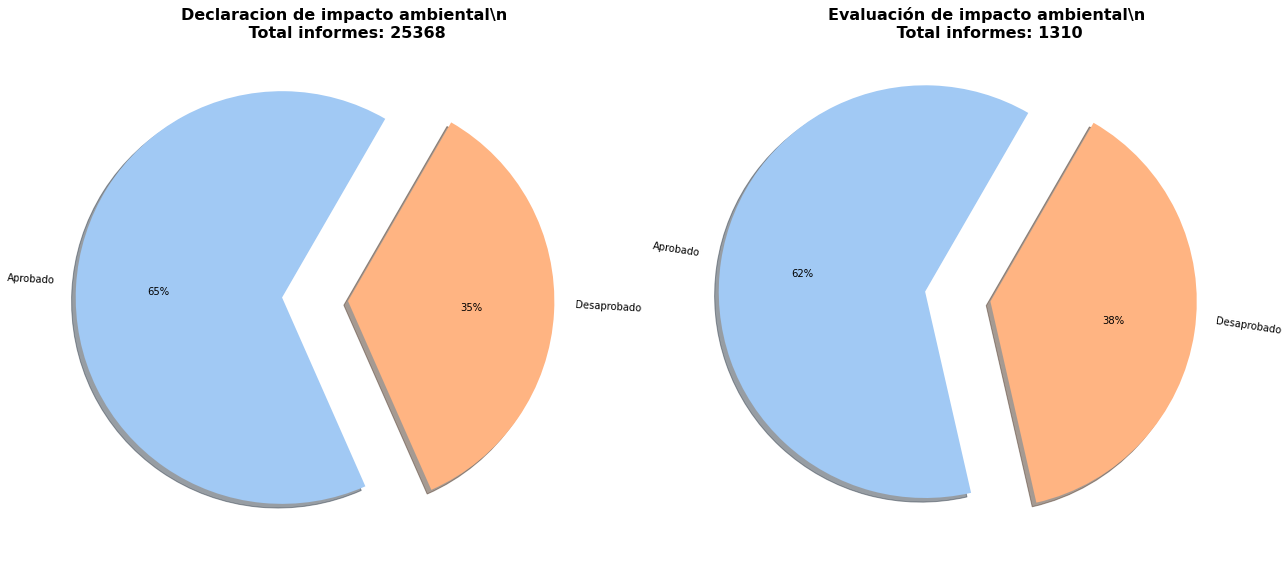

In [57]:

colors = sb.color_palette("pastel")
explode = [0.3,0.02]

fig, axes = plt.subplots(1, 2, figsize=(18, 10))


axes[0].pie(circular[0][circular["type"]=="DIA"], colors = colors, autopct = '%0.0f%%',explode = explode, labels=list(circular["state_new"][circular["type"]=="DIA"])
        ,shadow = 'True',rotatelabels = 'true',center = (0.1,0.4),startangle=60 );
axes[1].pie(circular[0][circular["type"]=="EIA"], colors = colors, autopct = '%0.0f%%',explode = explode, labels=list(circular["state_new"][circular["type"]=="DIA"])
        ,shadow = 'True',rotatelabels = 'true',center = (0.1,0.4),startangle=60 );
axes[0].set_title("Declaracion de impacto ambiental"+"\\n\n"+" Total informes: " +str(circular[0][circular["type"]=="DIA"].sum()), fontsize=16,fontweight="bold");
axes[1].set_title("Evaluación de impacto ambiental"+"\\n\n"+" Total informes: " +str(circular[0][circular["type"]=="EIA"].sum()), fontsize=16,fontweight="bold");
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico4", transparent=True)
plt.show()

In [58]:
#media2=df["investment"][df["investment"]<df["investment"].quantile(0.75)+1.5*(df["investment"].quantile(0.75)-df["investment"].quantile(0.25))
#np.round(media2)
df["investment"].quantile(0.75)+1.5*(df["investment"].quantile(0.75)-df["investment"].quantile(0.25))

17.3125

## 3.7 Histograma de los monto por tipo de documento

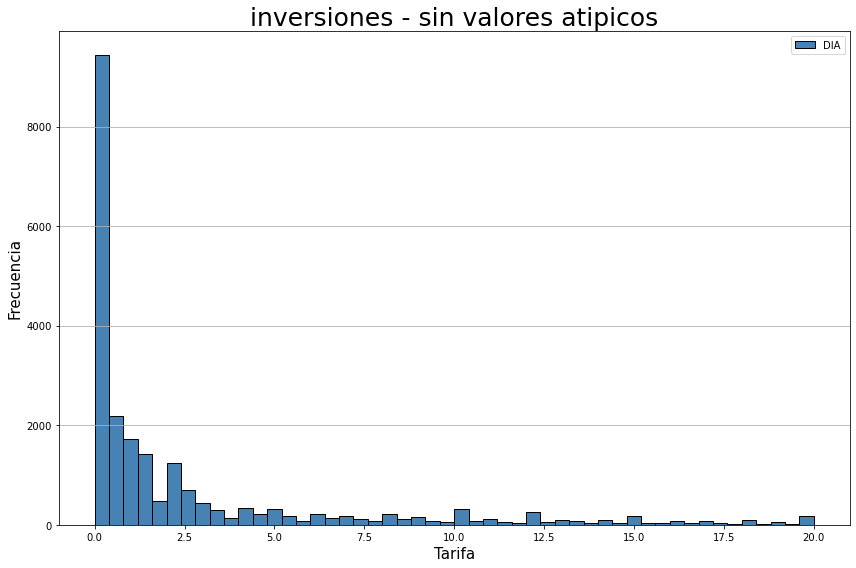

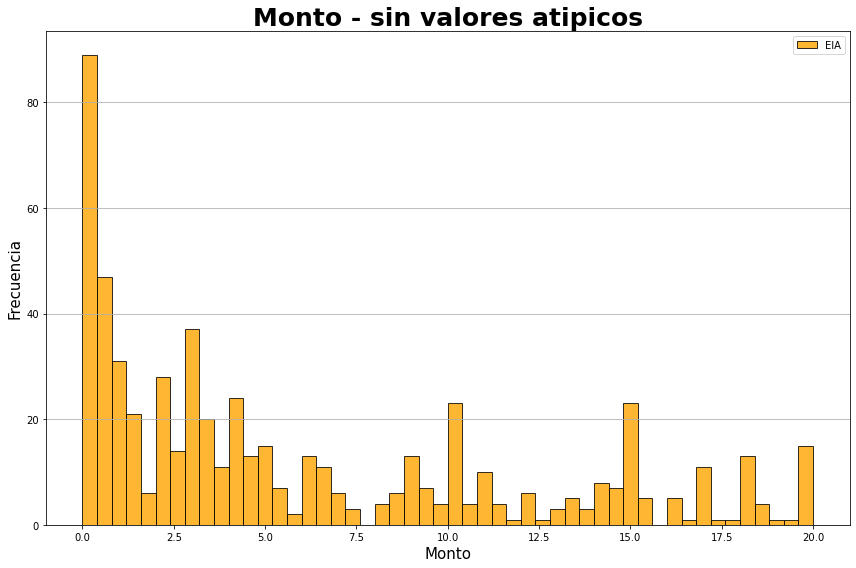

In [59]:
plt.figure(figsize=[12,8])
plt.hist(df['investment'][(df["type"]=="DIA") &(df["investment"]<=20) ],alpha = 1,label='DIA',bins=50, color='steelblue',edgecolor = 'black',  linewidth=1 );
plt.legend(loc='upper right')
plt.title("inversiones - sin valores atipicos", fontsize=25)
plt.xlabel("Tarifa",fontsize=15)
plt.ylabel("Frecuencia",fontsize=15)
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico6", transparent=True)

plt.figure(figsize=[12,8])
plt.hist(df['investment'][(df["type"]=="EIA") &(df["investment"]<=20) ],alpha = 0.8,label='EIA',bins=50, color='orange',edgecolor = 'black',  linewidth=1);
plt.legend(loc='upper right')
plt.title("Monto - sin valores atipicos", fontsize=25,fontweight="bold")
plt.xlabel("Monto",fontsize=15)
plt.ylabel("Frecuencia",fontsize=15)
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico5", transparent=True)

plt.show();

## 3.8 Cantidad por monto y cantidad de proyecto por regiones

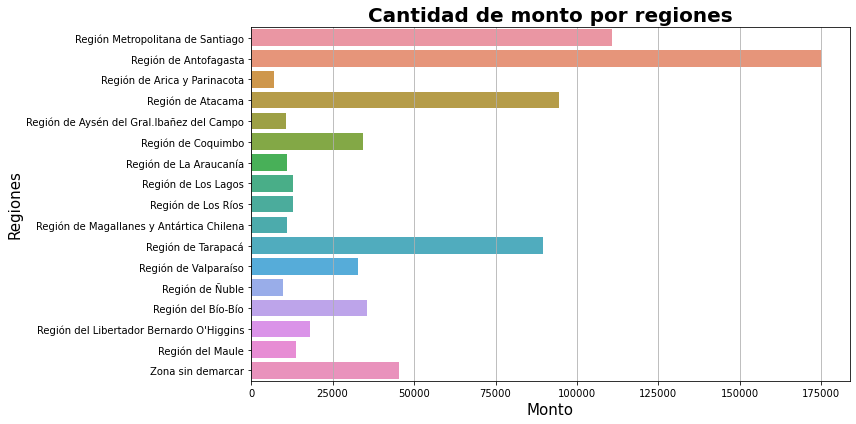

In [60]:
plt.figure(figsize=(12,6))
grafico1=pd.DataFrame(df.groupby("Region").sum()["investment"])
sb.barplot(y=grafico1.index,x=grafico1["investment"],orient="h")
plt.title("Cantidad de monto por regiones", fontsize=20, color="black",fontweight="bold")
plt.ylabel("Regiones", fontsize=15);
plt.grid(axis="x")
plt.xlabel("Monto",fontsize=15);
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico7", transparent=True)



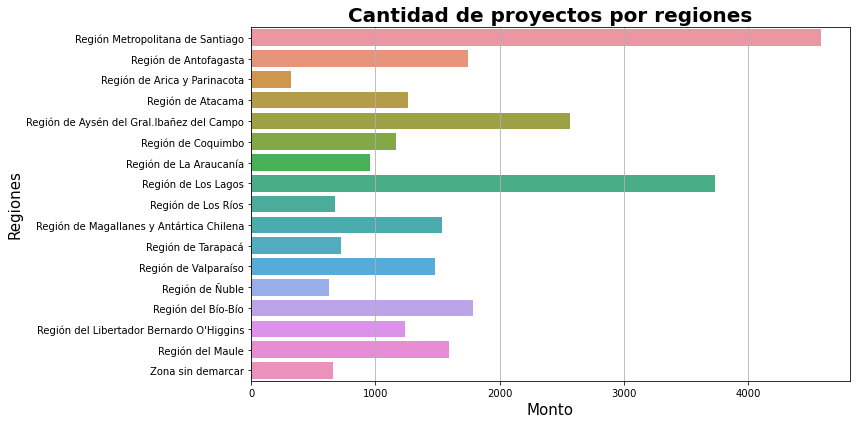

In [61]:
plt.figure(figsize=(12,6))
grafico1=pd.DataFrame(df.groupby("Region").count()["investment"])
sb.barplot(y=grafico1.index,x=grafico1["investment"],orient="h")
plt.title("Cantidad de proyectos por regiones", fontsize=20, color="black",fontweight="bold")
plt.ylabel("Regiones", fontsize=15);
plt.grid(axis="x")
plt.xlabel("Monto",fontsize=15);
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico8", transparent=True)


## 3.8 Cantidad de monto y cantidad de proyecto por zona

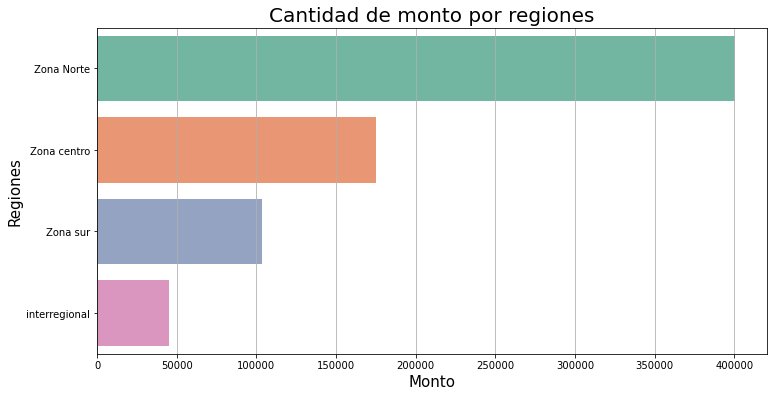

In [62]:
plt.figure(figsize=(12,6))
grafico1=pd.DataFrame(df.groupby("zona").sum()["investment"])
sb.barplot(y=grafico1.index,x=grafico1["investment"],orient="h", palette="Set2")
plt.title("Cantidad de monto por regiones", fontsize=20, color="black")
plt.ylabel("Regiones", fontsize=15);
plt.grid(axis="x")
plt.xlabel("Monto",fontsize=15);

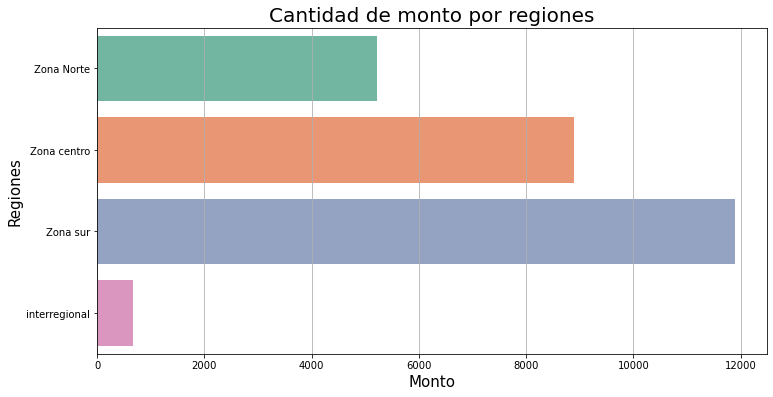

In [63]:
plt.figure(figsize=(12,6))
grafico1=pd.DataFrame(df.groupby("zona").count()["investment"])
sb.barplot(y=grafico1.index,x=grafico1["investment"],orient="h", palette="Set2")
plt.title("Cantidad de monto por regiones", fontsize=20, color="black")
plt.ylabel("Regiones", fontsize=15);
plt.grid(axis="x")
plt.xlabel("Monto",fontsize=15);

## 3.9 Histograma del numero de documento, participantes y anexos 

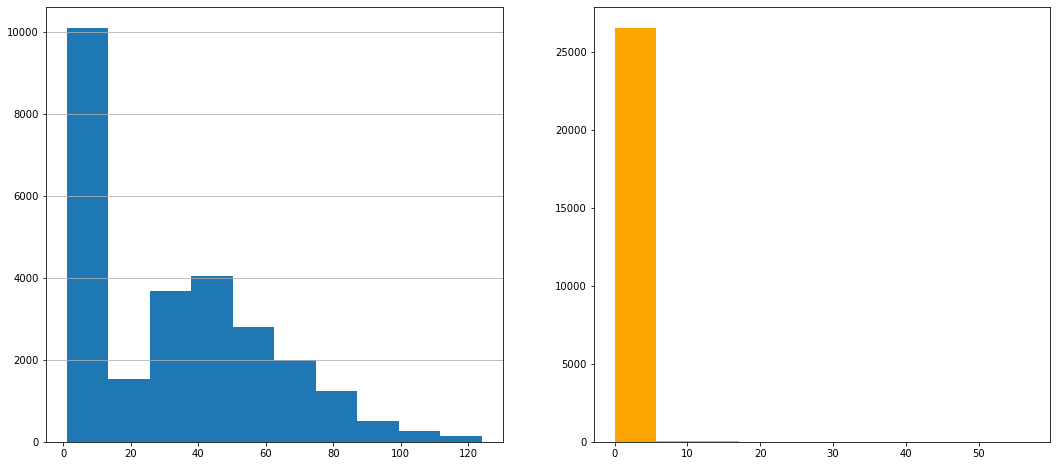

In [64]:

colors = sb.color_palette("pastel")
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=False)
axes[0].hist(df["n_docs"][df["n_docs"]<df["n_docs"].quantile(0.75)+1.5*(df["n_docs"].quantile(0.75)-df["n_docs"].quantile(0.25))]);
axes[1].hist(df["n_participatory"], color="orange");
axes[0].grid(axis="y")

In [65]:
df["n_participatory"].value_counts(normalize=True)

0     0.990292
3     0.001424
2     0.001237
4     0.001199
1     0.001162
6     0.000787
5     0.000787
7     0.000525
9     0.000375
8     0.000337
10    0.000337
12    0.000225
13    0.000150
14    0.000150
20    0.000112
11    0.000112
16    0.000112
18    0.000075
15    0.000075
24    0.000075
27    0.000075
21    0.000075
36    0.000037
57    0.000037
47    0.000037
31    0.000037
28    0.000037
23    0.000037
26    0.000037
17    0.000037
Name: n_participatory, dtype: float64

No handles with labels found to put in legend.


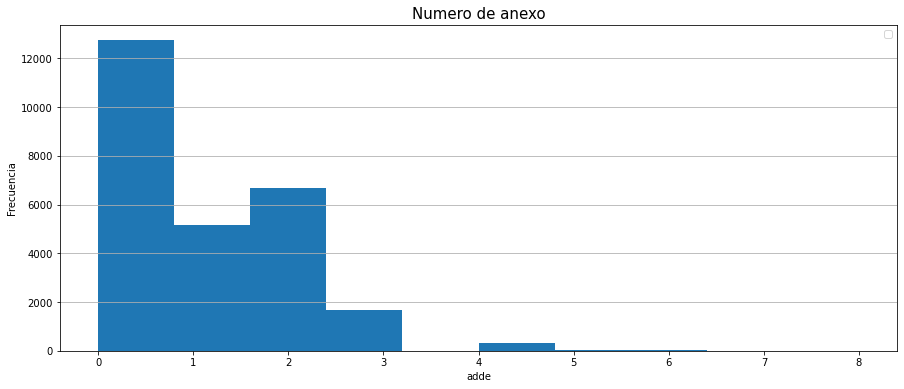

In [66]:
plt.figure(figsize=[15,6])
plt.hist(df["n_addendum"]);
plt.legend(loc='upper right')
plt.title("Numero de anexo", fontsize=15)
plt.xlabel("adde",fontsize=10)
plt.ylabel("Frecuencia",fontsize=10)
plt.grid(axis="y")

## 3.10 Cantidad de proyecto por años

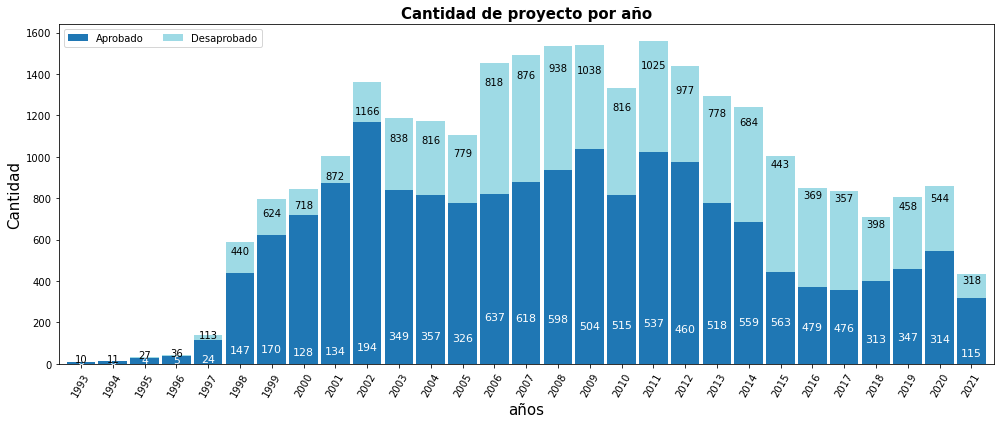

In [67]:
def add_value_label(x_list,y_list,porcentaje):
    for i in range(1, len(x_list)+1):
        plt.annotate(str(int(porcentaje[i-1])),(i-1,y_list[i-1]/3),ha="center",color="White",fontsize=11)
def add_value_label2(x_list,y_list,ybase,porcentaje):   
    for i in range(1, len(x_list)+1):
        plt.annotate(str(int(porcentaje[i-1])),(i-1,ybase[i-1]+y_list[i-1]/1.15),ha="center", color="Black",fontsize=10)

pivot=pd.DataFrame(df.groupby(["año","state_new"]).count()["investment"]).reset_index()
pivot1=pd.pivot(data=pivot,index="año",columns="state_new",values="investment").fillna(0)
pivot1.plot(kind='bar', 
                    stacked=True, 
            
                    colormap= 'tab20',
                    figsize=(14, 6),mark_right = True,
                    legend=True, width=0.90 );

add_value_label(list(pivot1.index),list(pivot1["Desaprobado"]),list(pivot1["Desaprobado"]))
add_value_label2(list(pivot1.index),list(pivot1["Aprobado"]),list(pivot1["Desaprobado"]),list(pivot1["Aprobado"]))

plt.legend(loc="upper left", ncol=2)
plt.title("Cantidad de proyecto por año", fontsize=15,fontweight="bold")
plt.ylabel("Cantidad",fontsize=15)
plt.xlabel("años",fontsize=15)
plt.xticks(rotation=60)
plt.tight_layout()
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico9", transparent=True)
plt.show();

## 3.11 Cantidad de monto por años

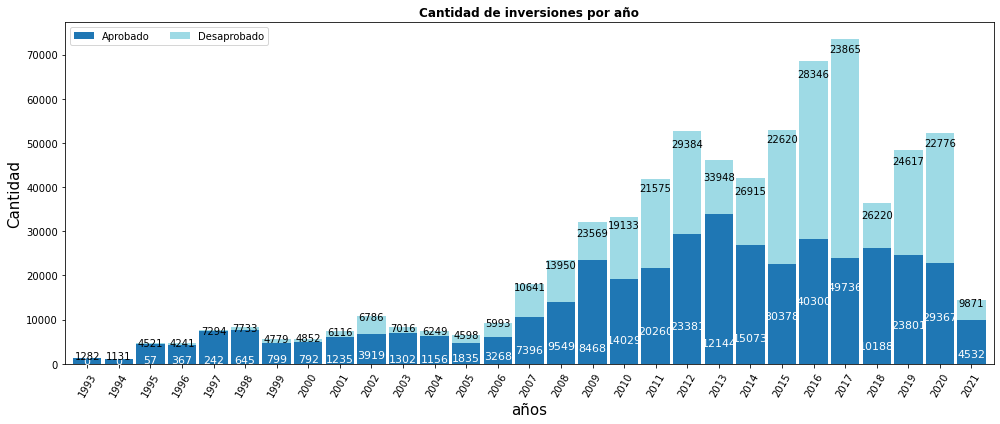

In [68]:
def add_value_label(x_list,y_list,porcentaje):
    for i in range(1, len(x_list)+1):
        plt.annotate(str(int(porcentaje[i-1])),(i-1,y_list[i-1]/3),ha="center",color="White",fontsize=11)
def add_value_label2(x_list,y_list,ybase,porcentaje):   
    for i in range(1, len(x_list)+1):
        plt.annotate(str(int(porcentaje[i-1])),(i-1,ybase[i-1]+y_list[i-1]/1.15),ha="center", color="Black",fontsize=10)

pivot=pd.DataFrame(df.groupby(["año","state_new"]).sum()["investment"]).reset_index()
pivot1=pd.pivot(data=pivot,index="año",columns="state_new",values="investment").fillna(0)
pivot1.plot(kind='bar', 
                    stacked=True, 
            
                    colormap= 'tab20',
                    figsize=(14, 6),mark_right = True,
                    legend=True, width=0.90 );

add_value_label(list(pivot1.index),list(pivot1["Desaprobado"]),list(pivot1["Desaprobado"]))
add_value_label2(list(pivot1.index),list(pivot1["Aprobado"]),list(pivot1["Desaprobado"]),list(pivot1["Aprobado"]))

plt.legend(loc="upper left", ncol=2)
plt.title("Cantidad de inversiones por año",fontweight="bold")
plt.ylabel("Cantidad",fontsize=15)
plt.xlabel("años",fontsize=15)
plt.xticks(rotation=60)
plt.tight_layout()
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico10", transparent=True)
plt.show();

## 3.12 Cantidad de proyectos por zona

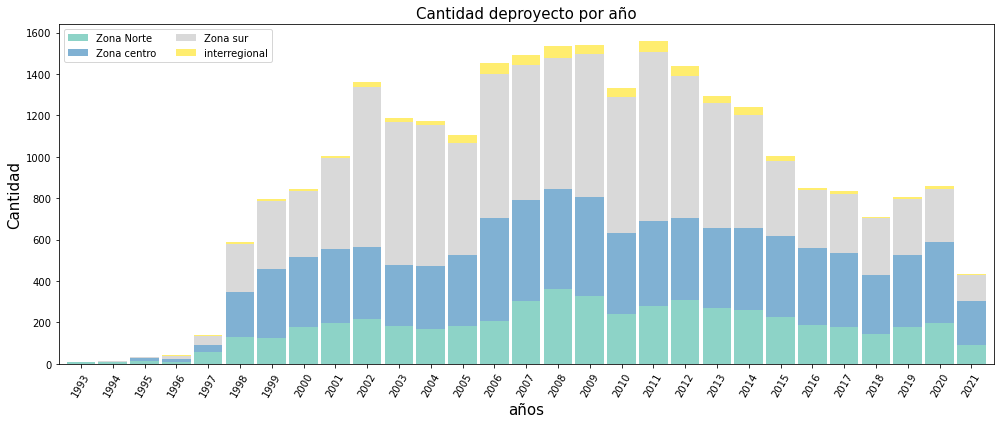

In [69]:
pivot=pd.DataFrame(df.groupby(["año","zona"]).count()["investment"]).reset_index()
pivot1=pd.pivot(data=pivot,index="año",columns="zona",values="investment").fillna(0)
pivot1.plot(kind='bar', 
                    stacked=True, 
            
                    colormap= 'Set3',
                    figsize=(14, 6),mark_right = True,
                    legend=True, width=0.90 );


plt.legend(loc="upper left", ncol=2)
plt.title("Cantidad deproyecto por año", fontsize=15)
plt.ylabel("Cantidad",fontsize=15)
plt.xlabel("años",fontsize=15)
plt.xticks(rotation=60)
plt.tight_layout()

plt.show();

## 3.13 Cantidad de proyecto por regiones

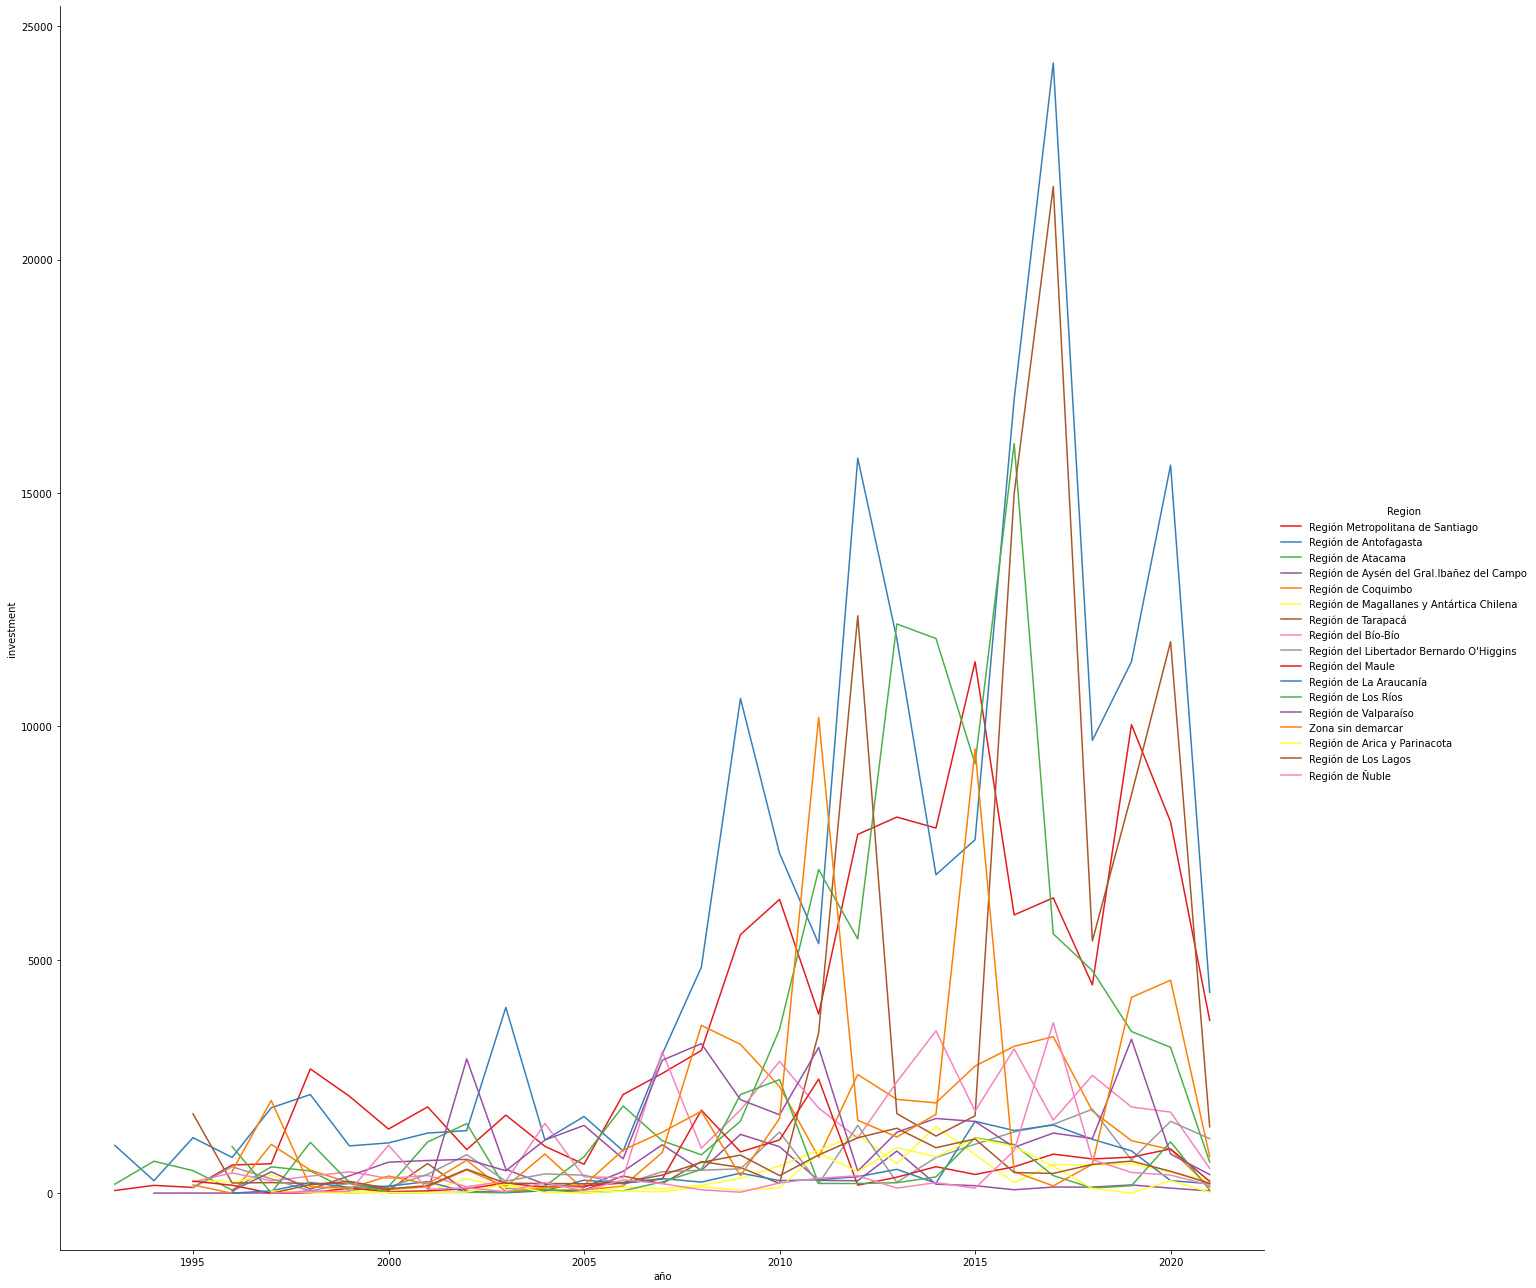

In [70]:

grafico2=pd.DataFrame(df.groupby(["año","Region"]).sum()["investment"]).reset_index()

sb.relplot(data=grafico2,x="año", y="investment",hue="Region",kind="line",height=18, palette="Set1", legend="auto" );


## Guargo data de avance

In [ ]:
df.to_excel("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/avance1.xlsx")